In [1]:
# importing all the packages and naming them as per our convinience.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
"""Prepare a model for glass classification using KNN"""

'Prepare a model for glass classification using KNN'

In [3]:
# load the data set using pandas
data=pd.read_csv("E:\\KNN\\Glass.csv")
data

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [4]:
# creating a dataframe using pandas.
df=pd.DataFrame(data)
df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [5]:
# now we have to perform EDA
df.shape

(214, 10)

In [6]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


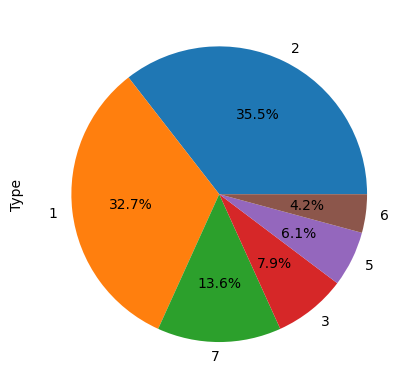

In [31]:
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

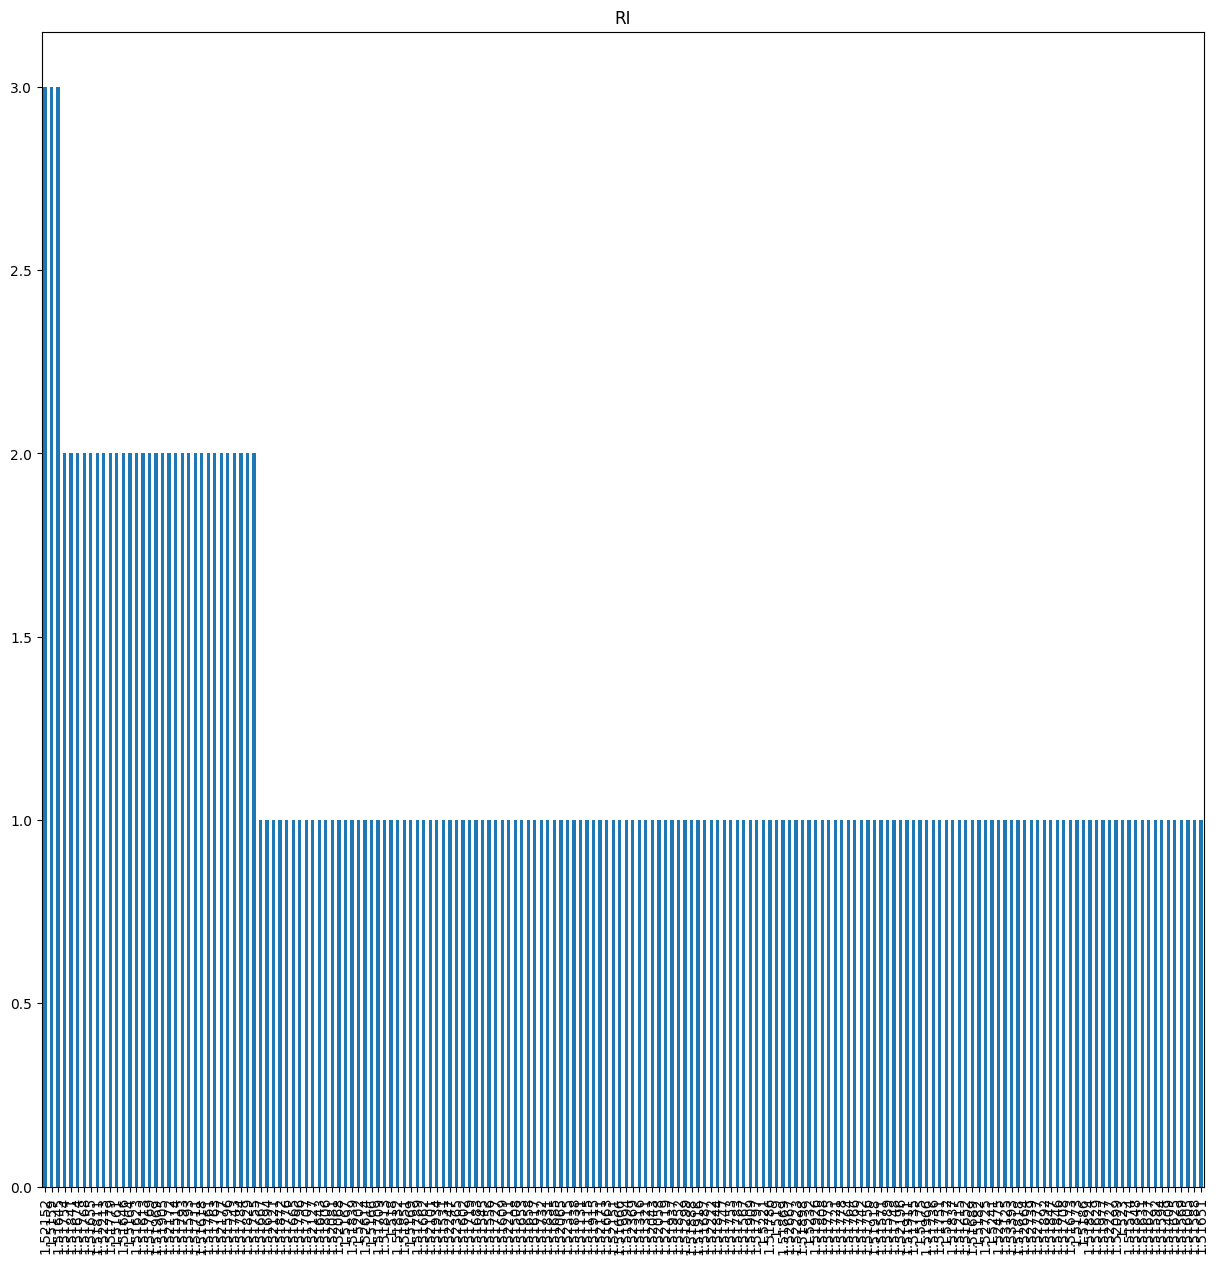

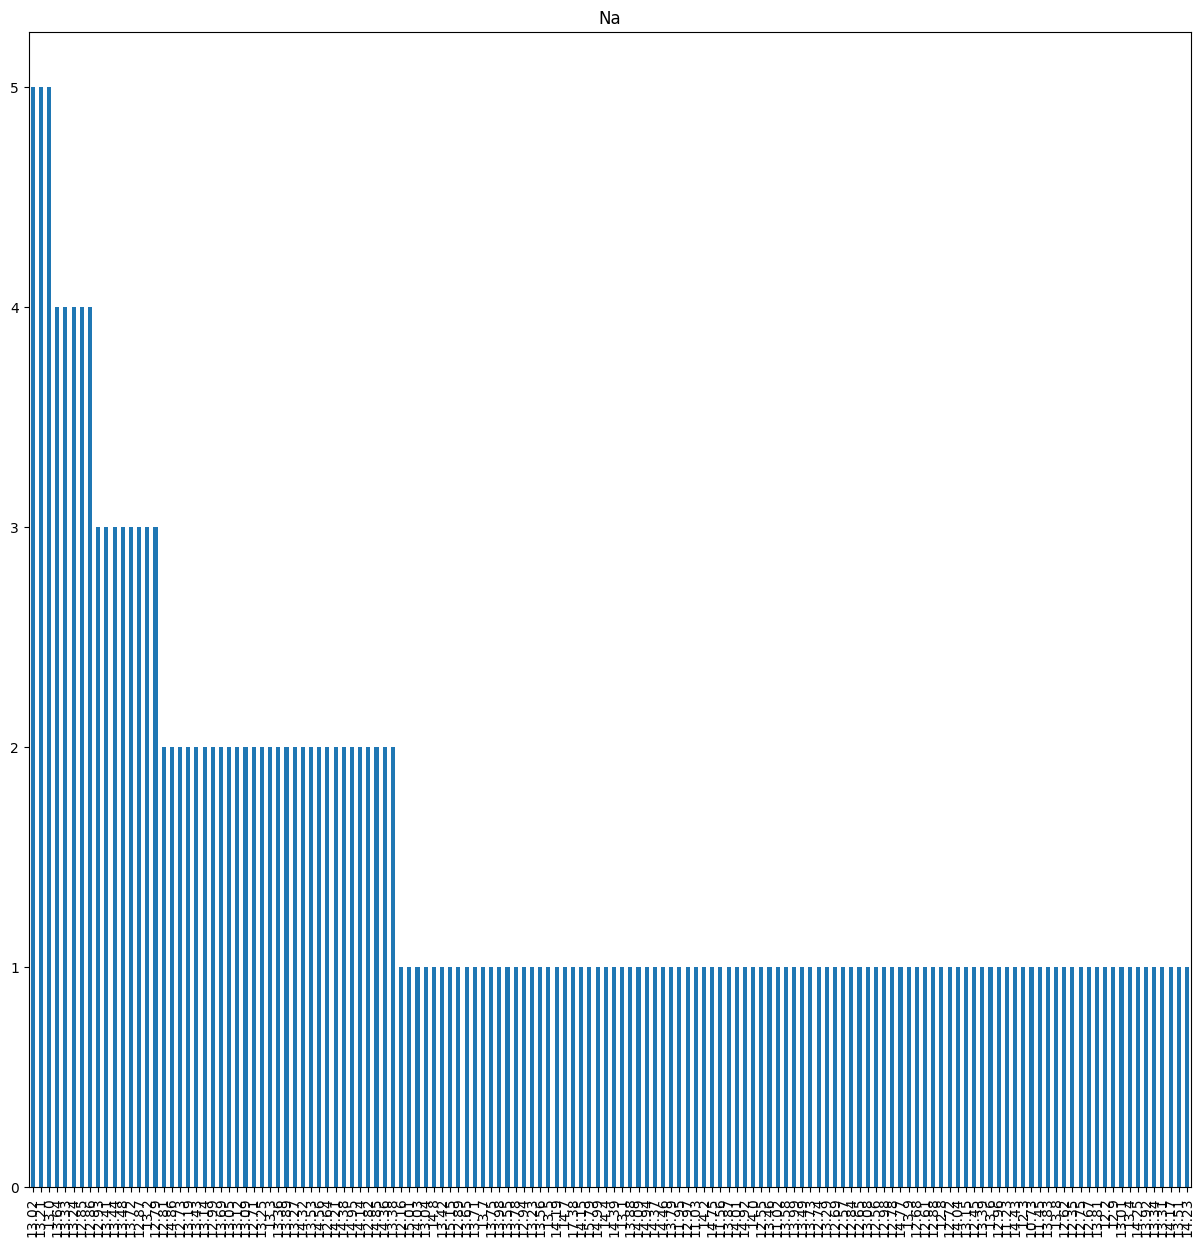

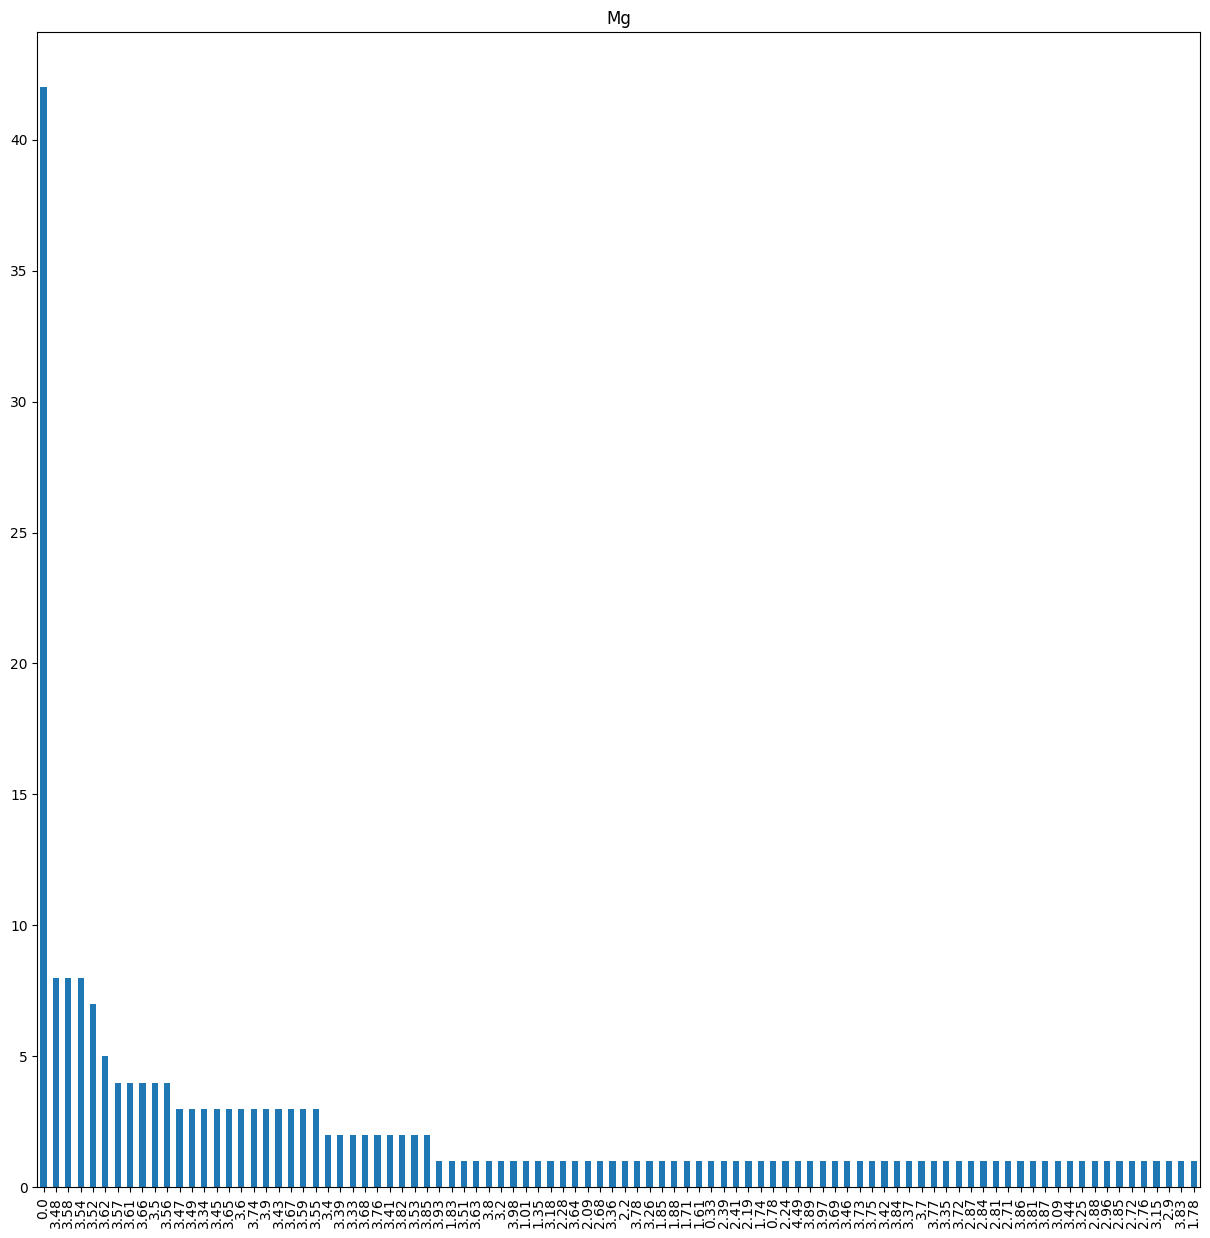

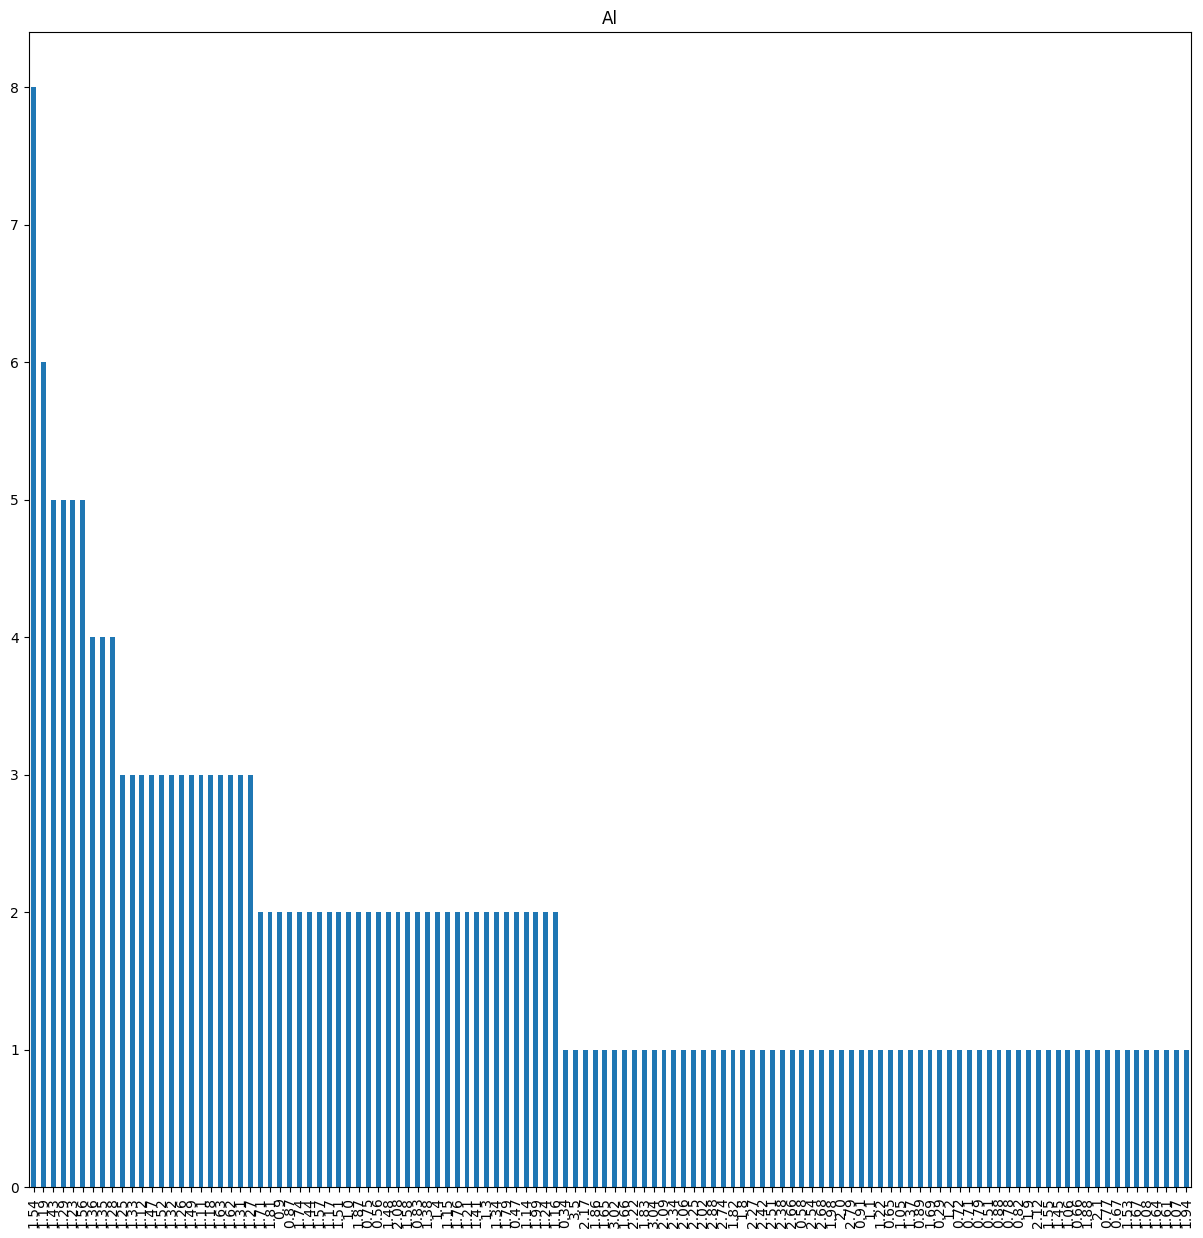

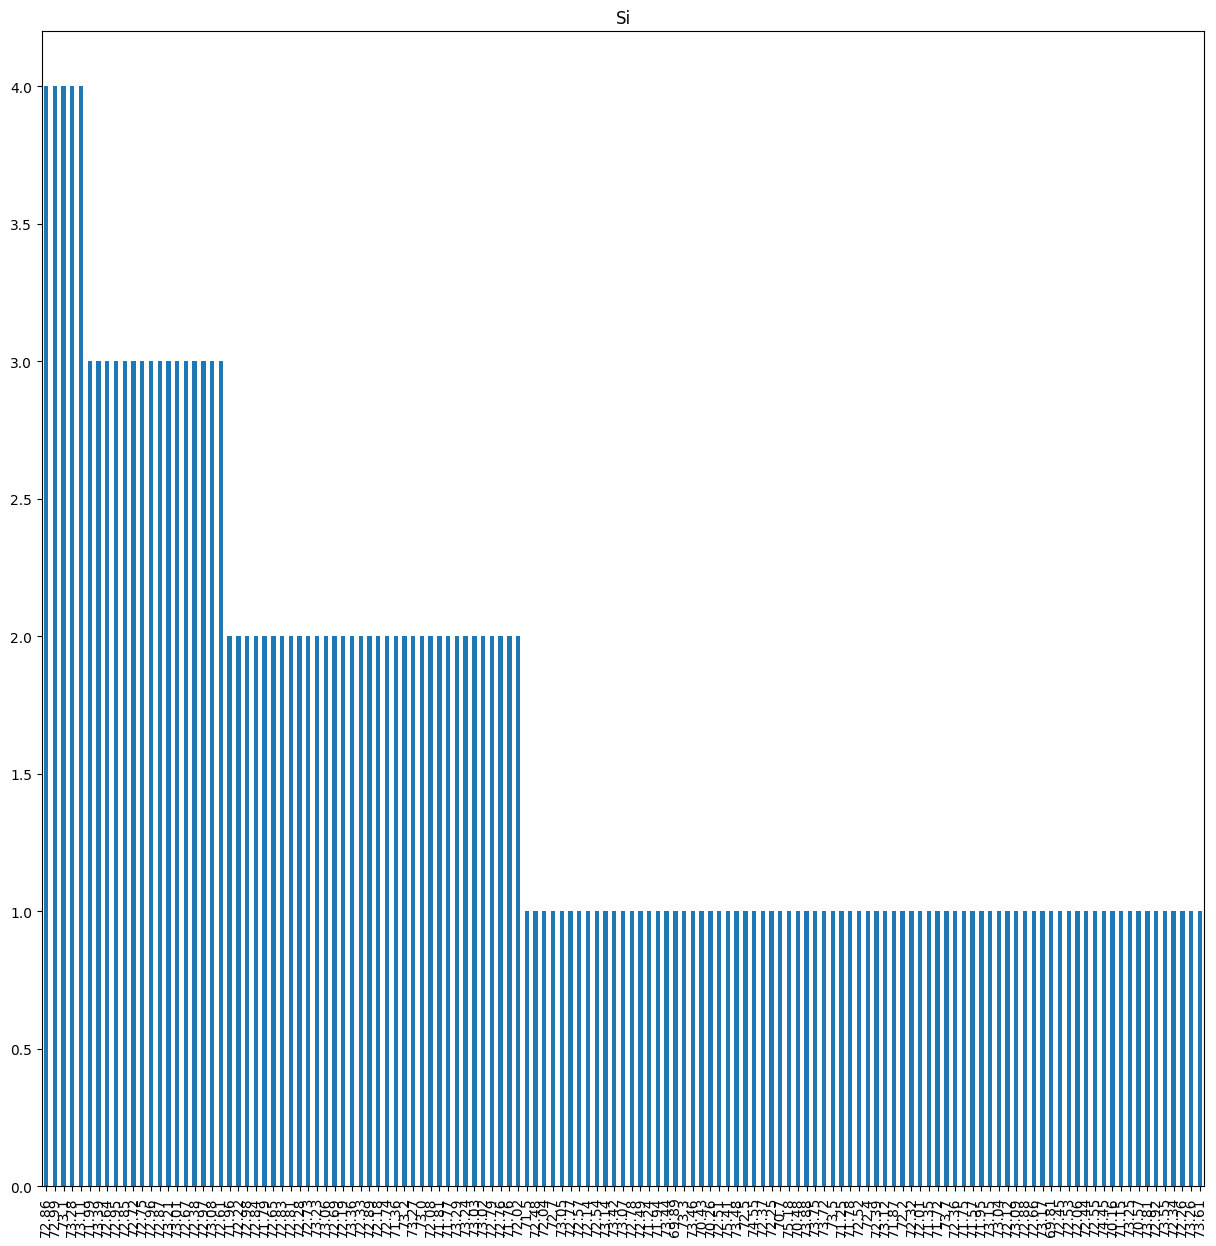

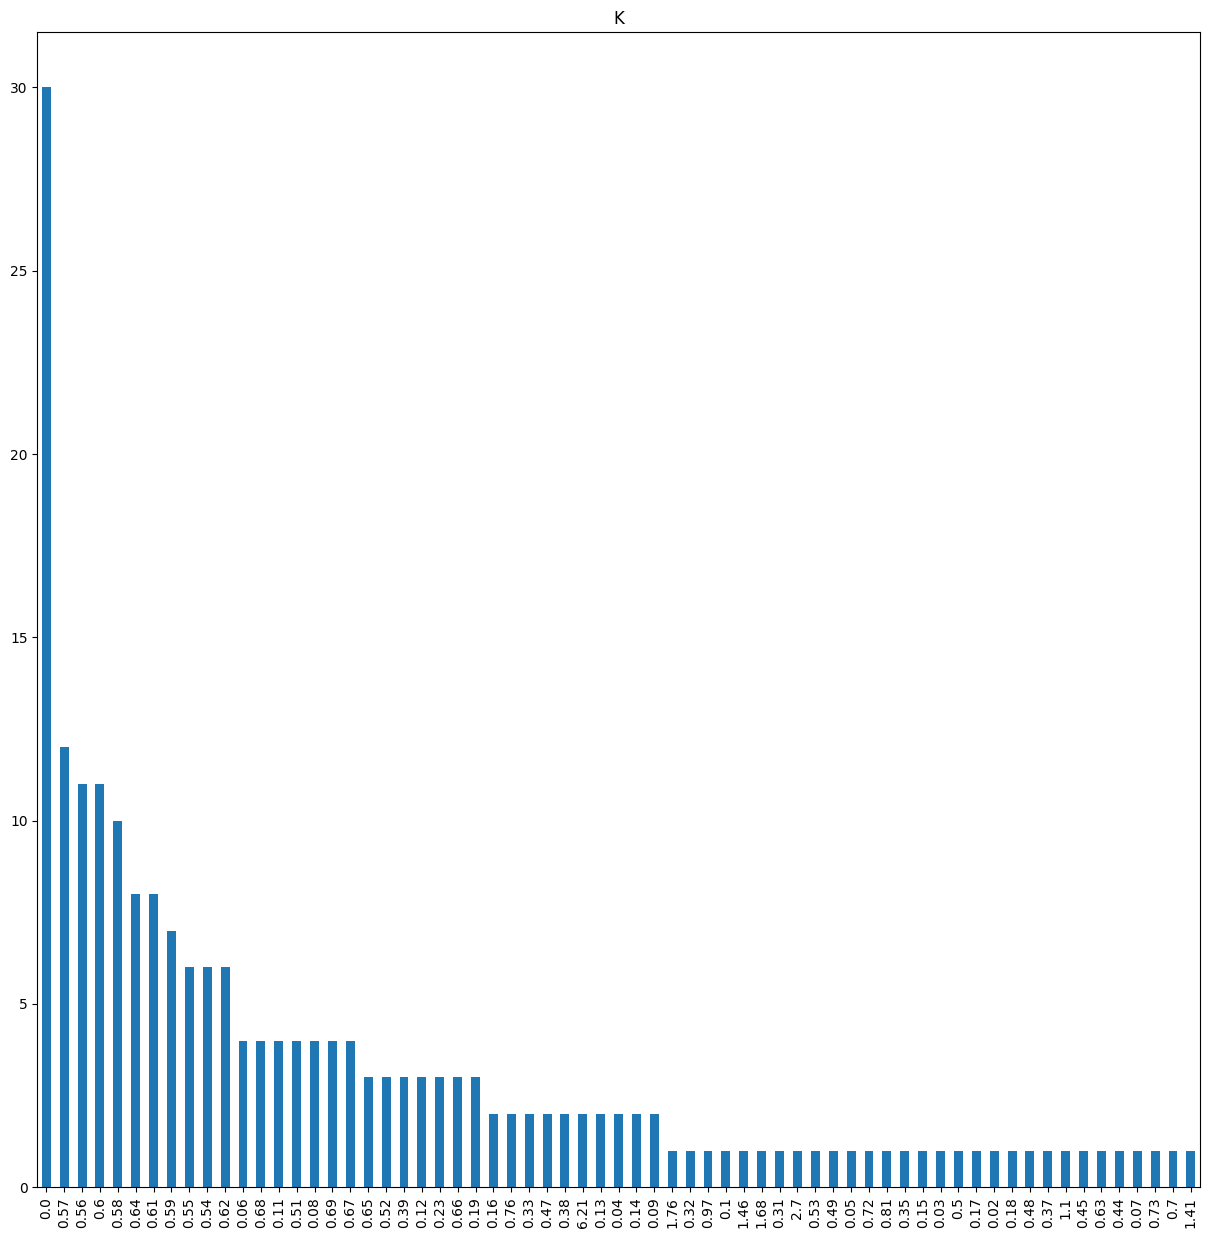

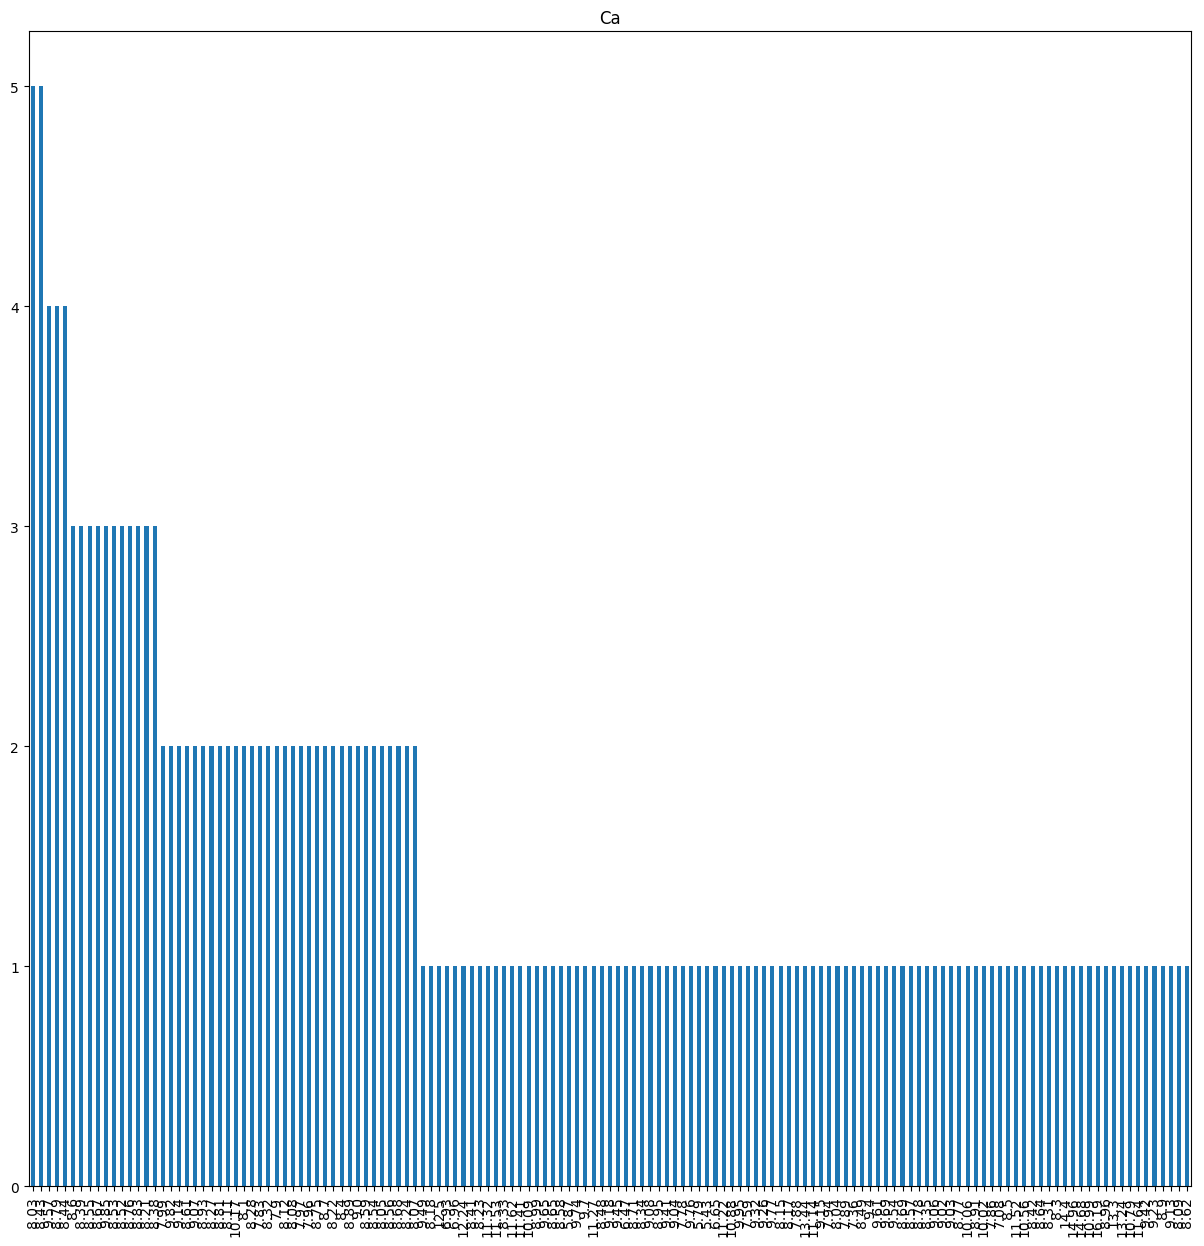

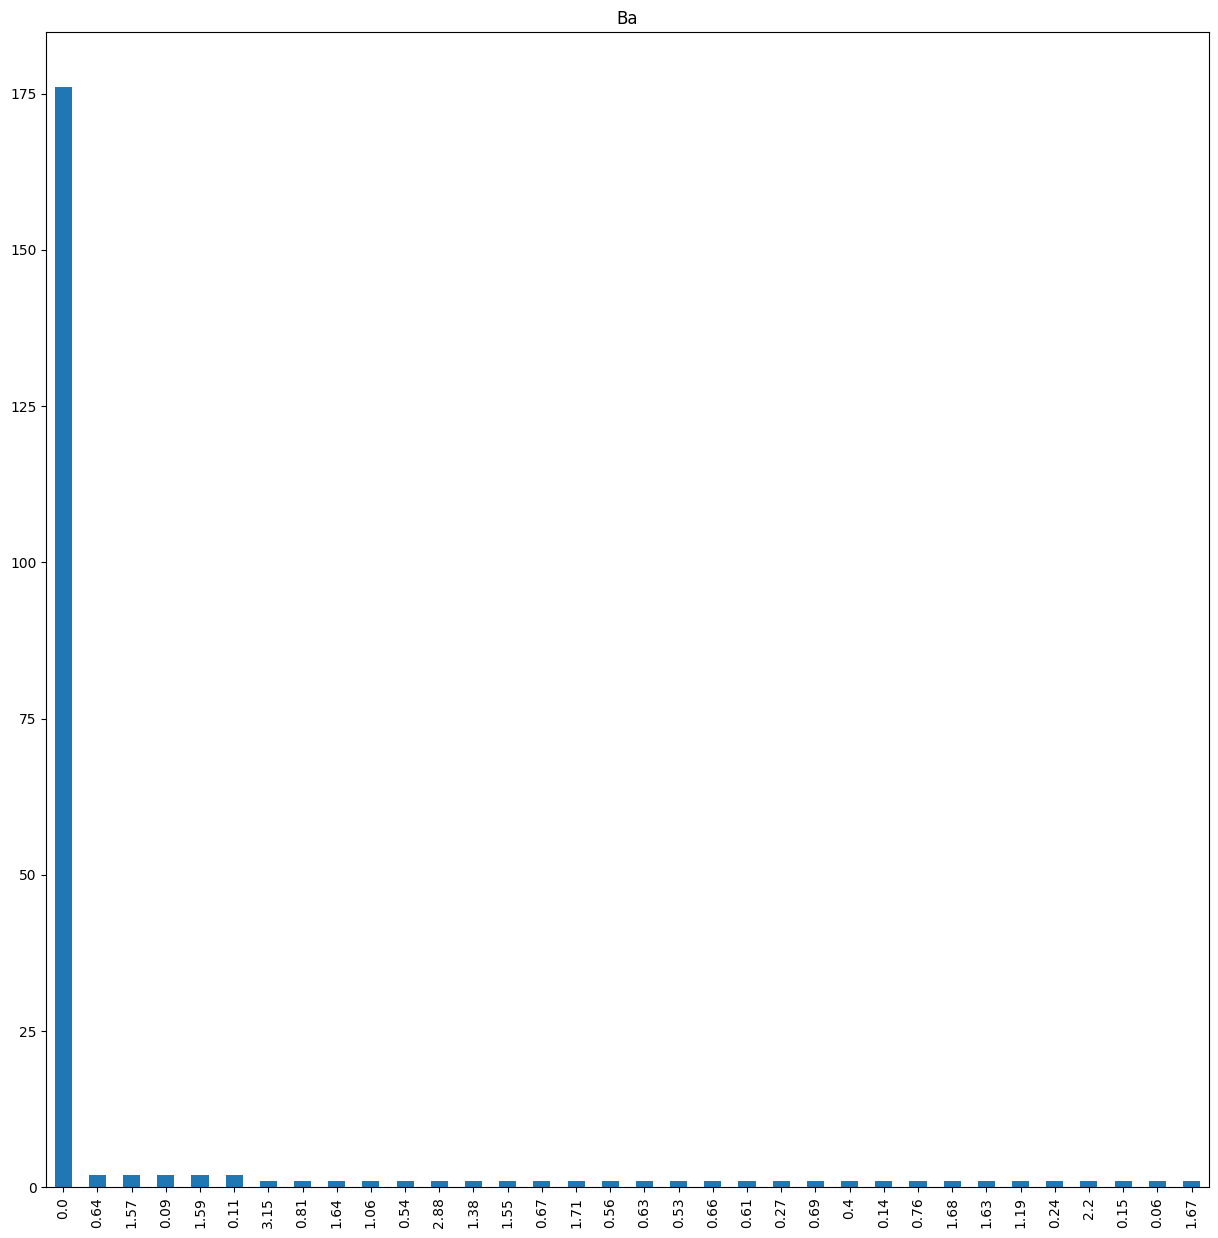

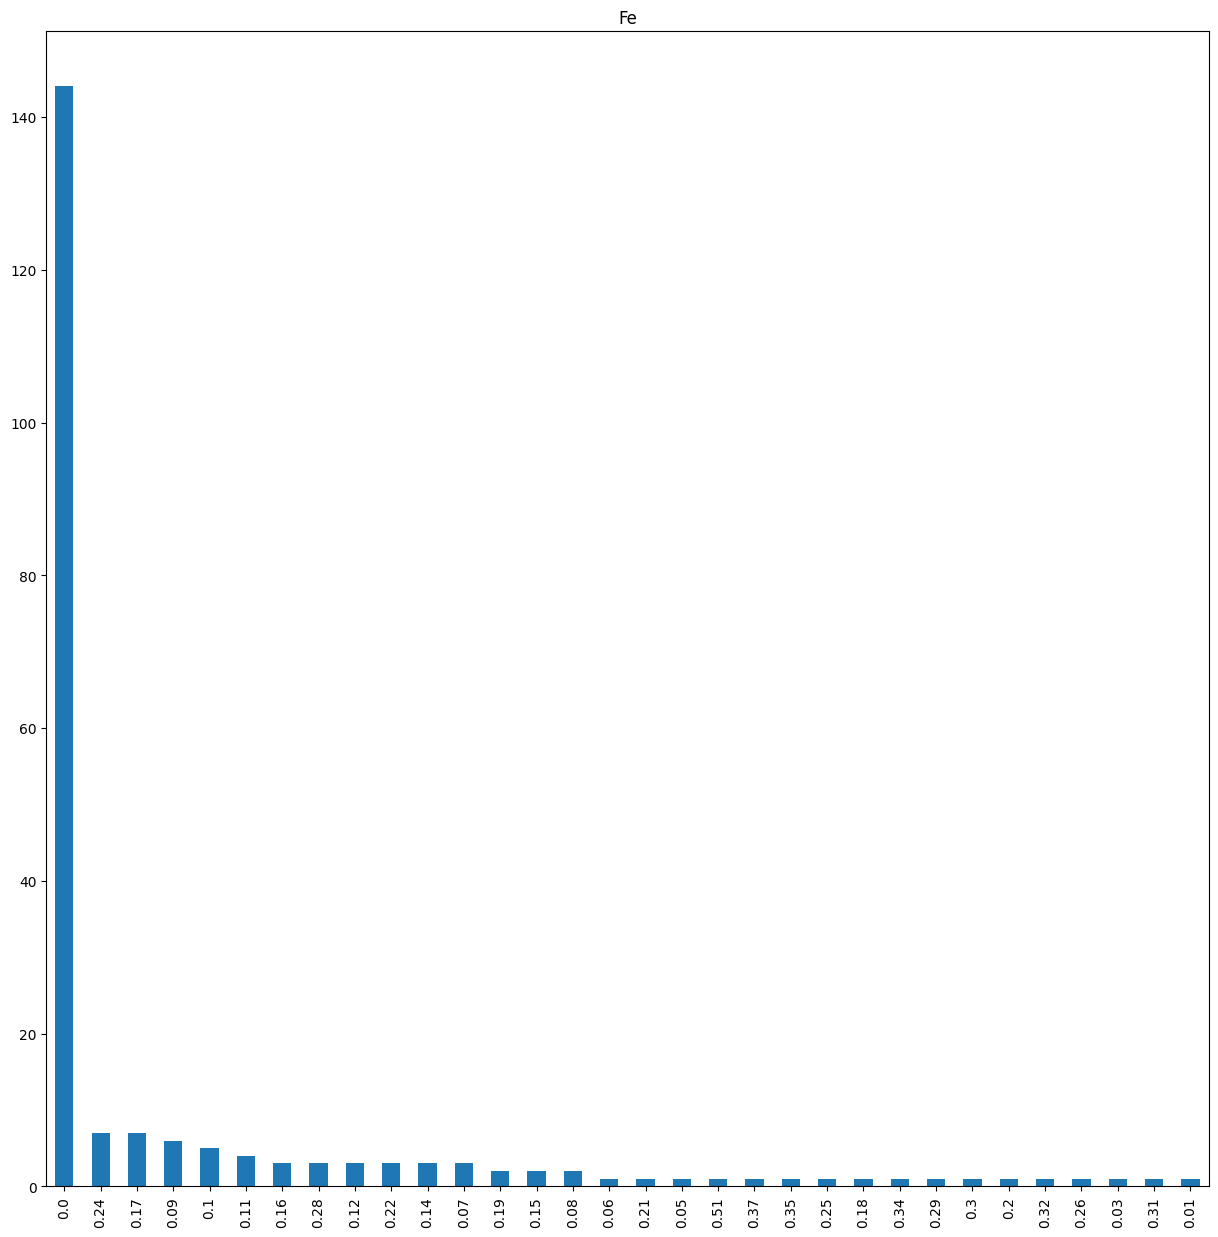

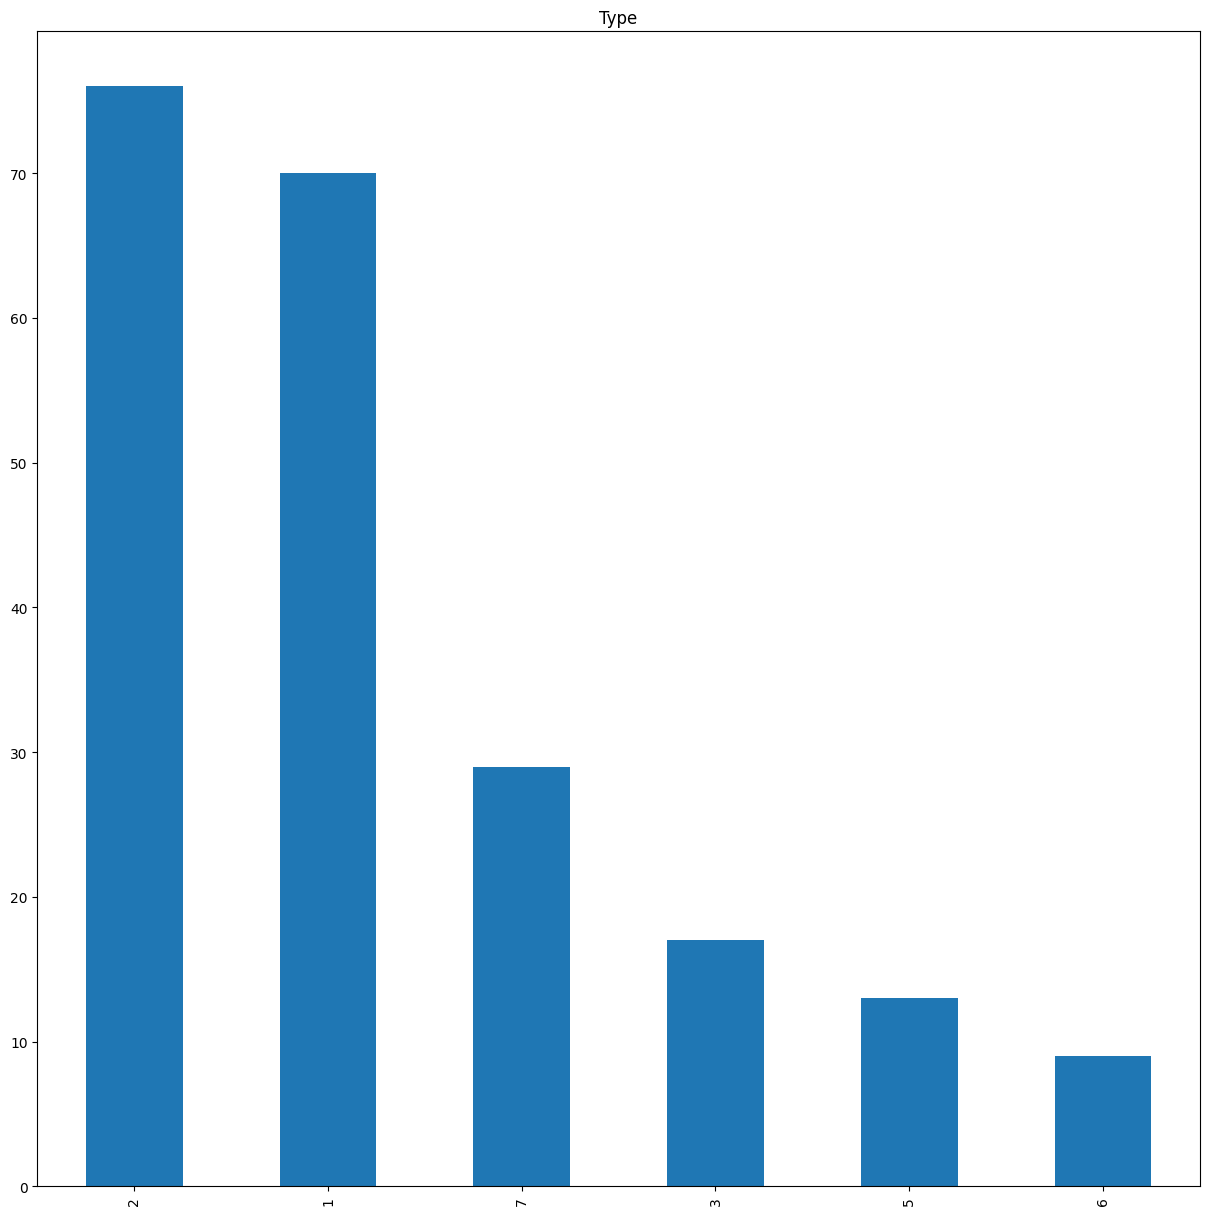

In [35]:
for i in range(len(df.columns)):
    current_column = df.iloc[:, i]
    current_column.value_counts().plot(kind='bar',figsize=(15,15))
    plt.title(current_column.name)
    plt.show()

# bar plots also represent how many o's and 1's present in each variable

In [7]:
# checking if there are any null values in the whole data using isna and sum function

df.isna().sum()

# we can see that  there are no null values in the whole data

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

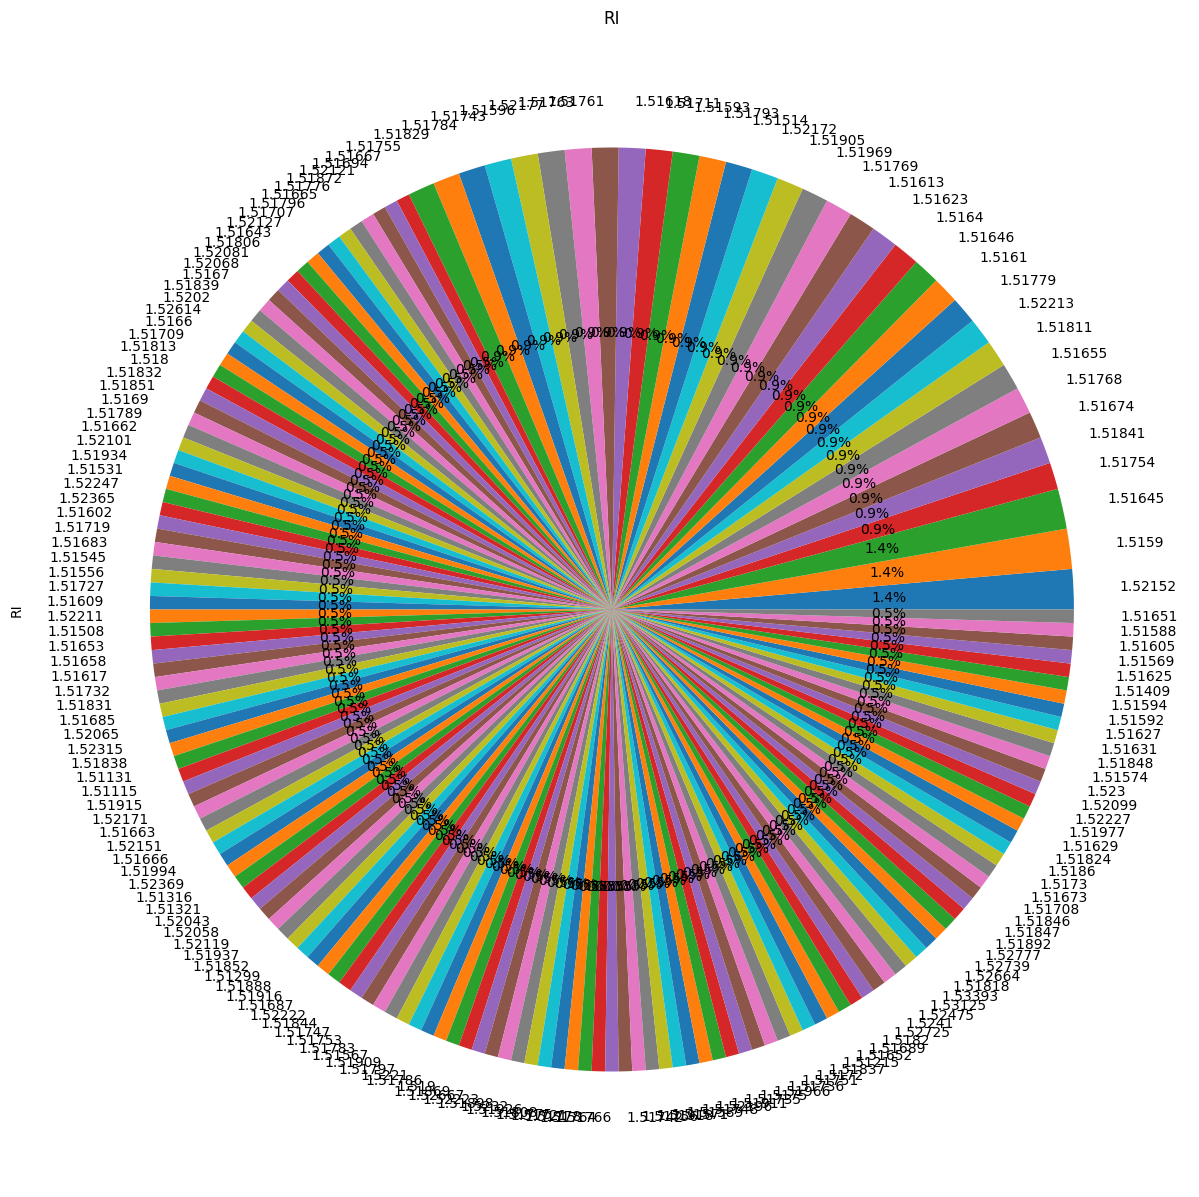

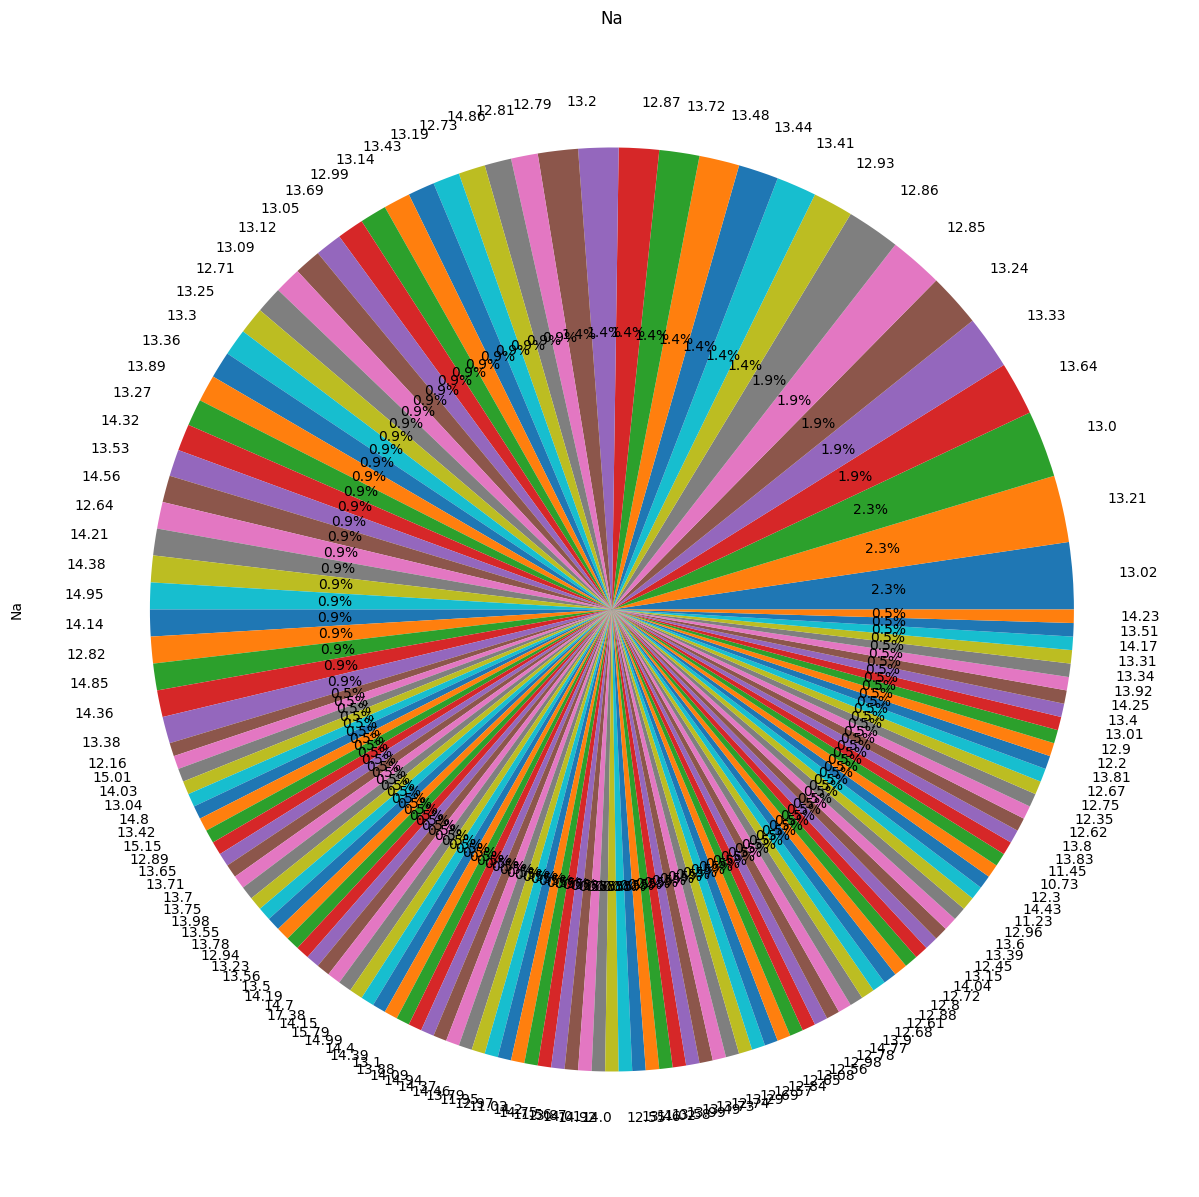

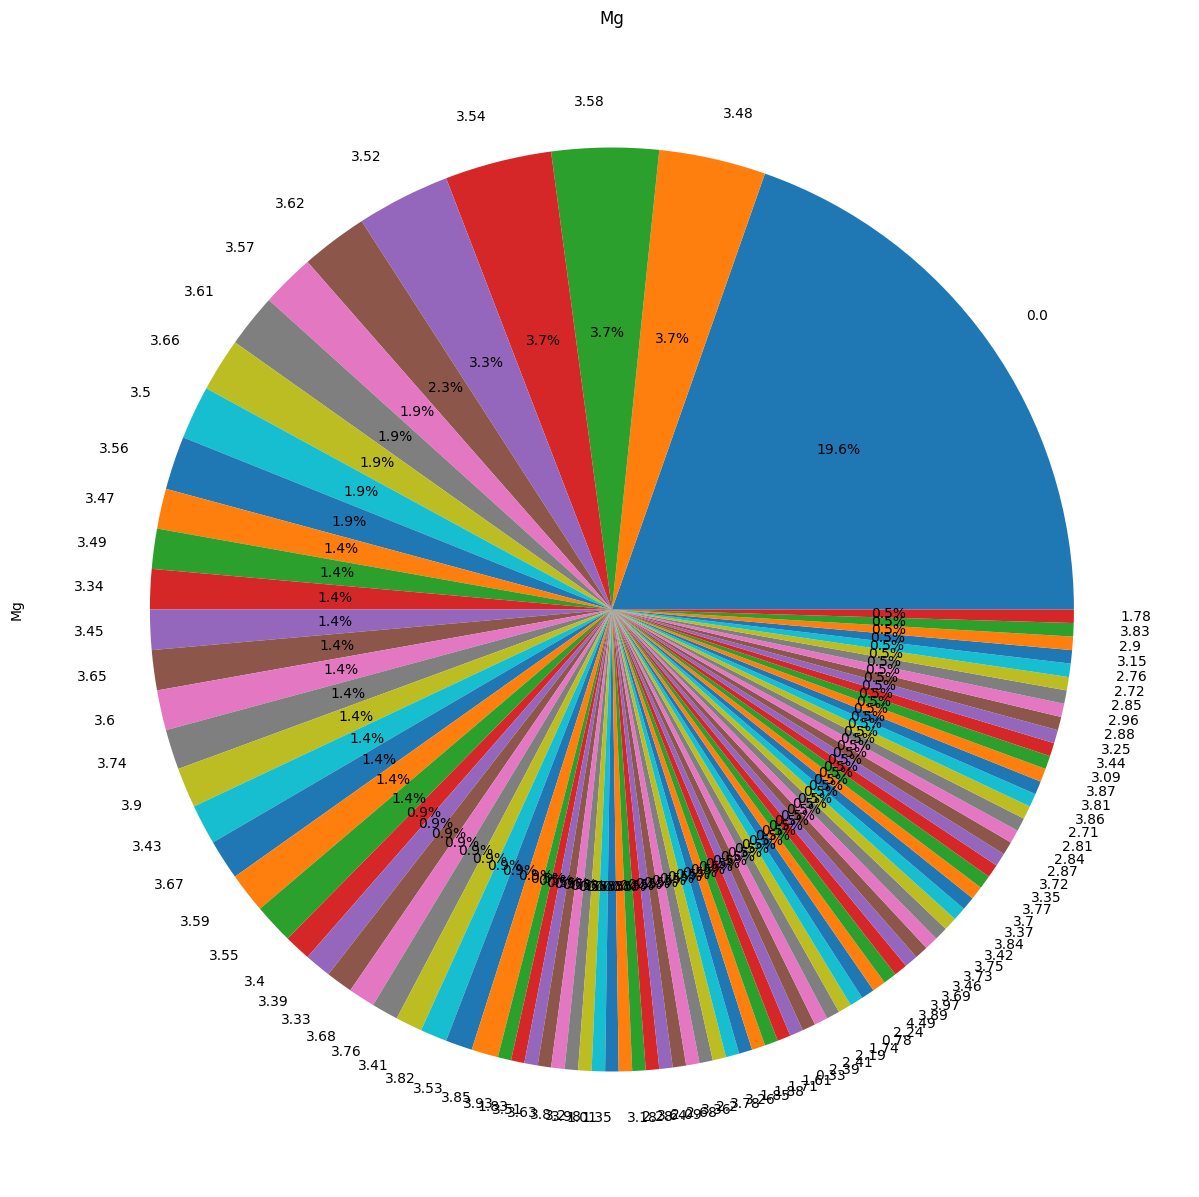

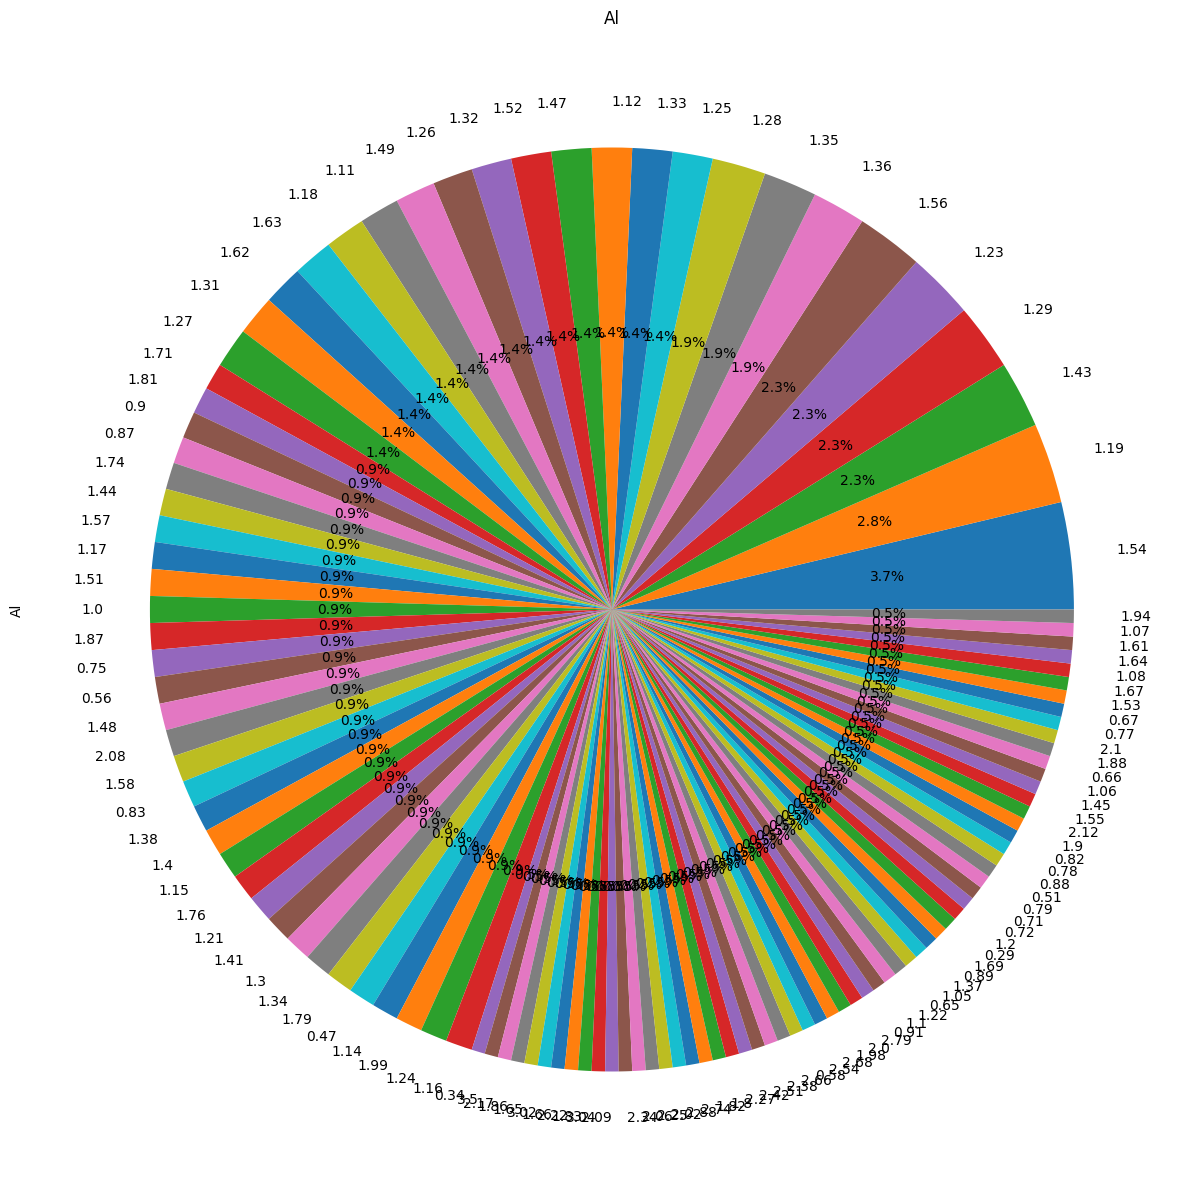

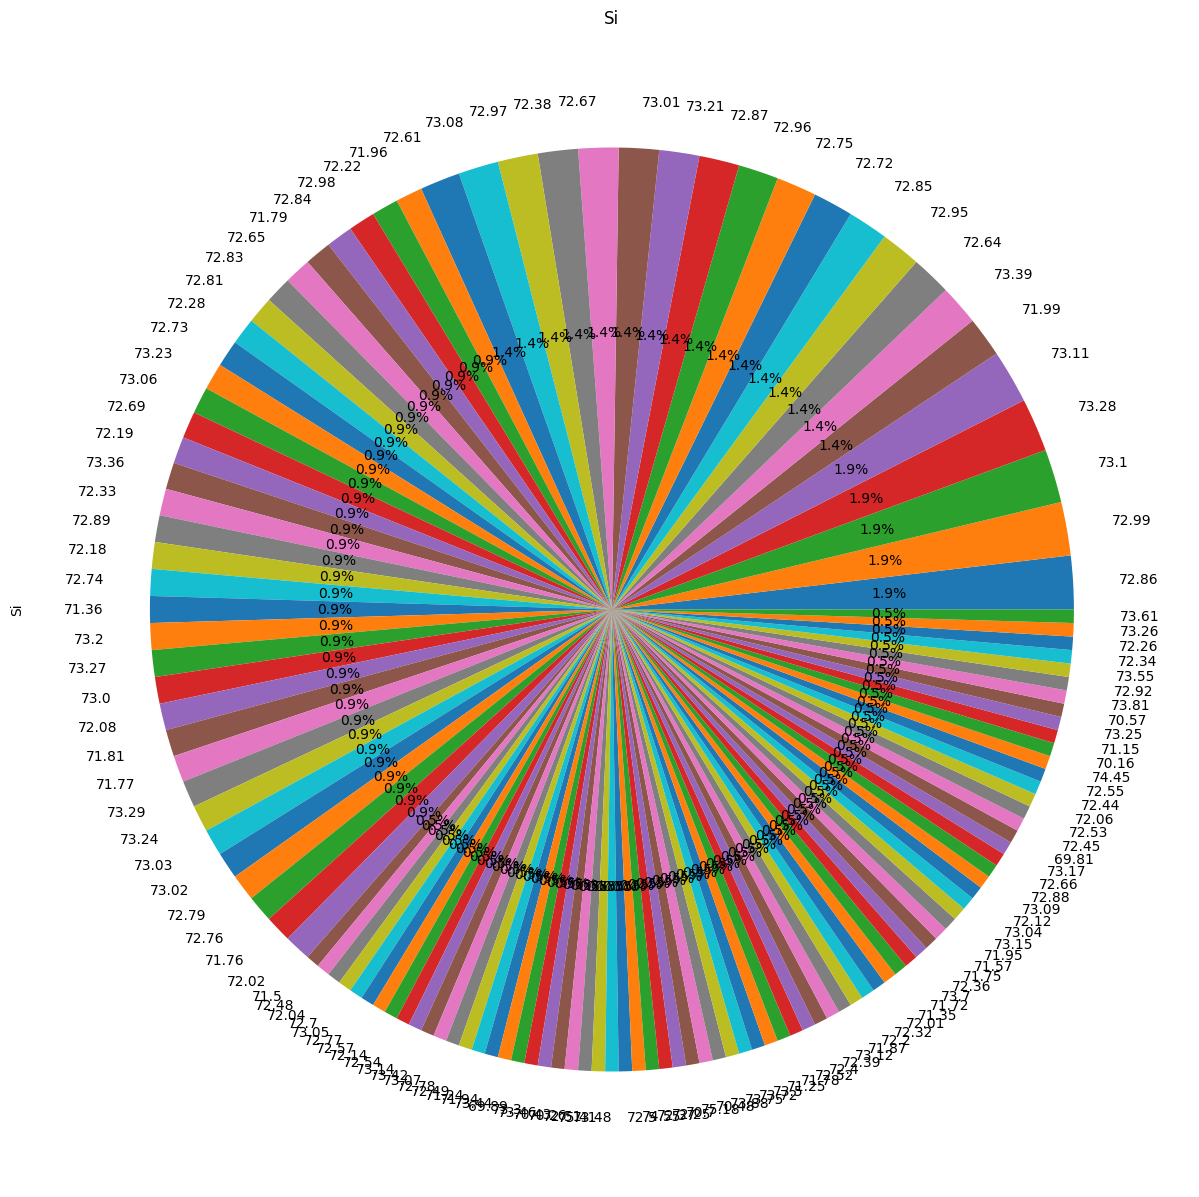

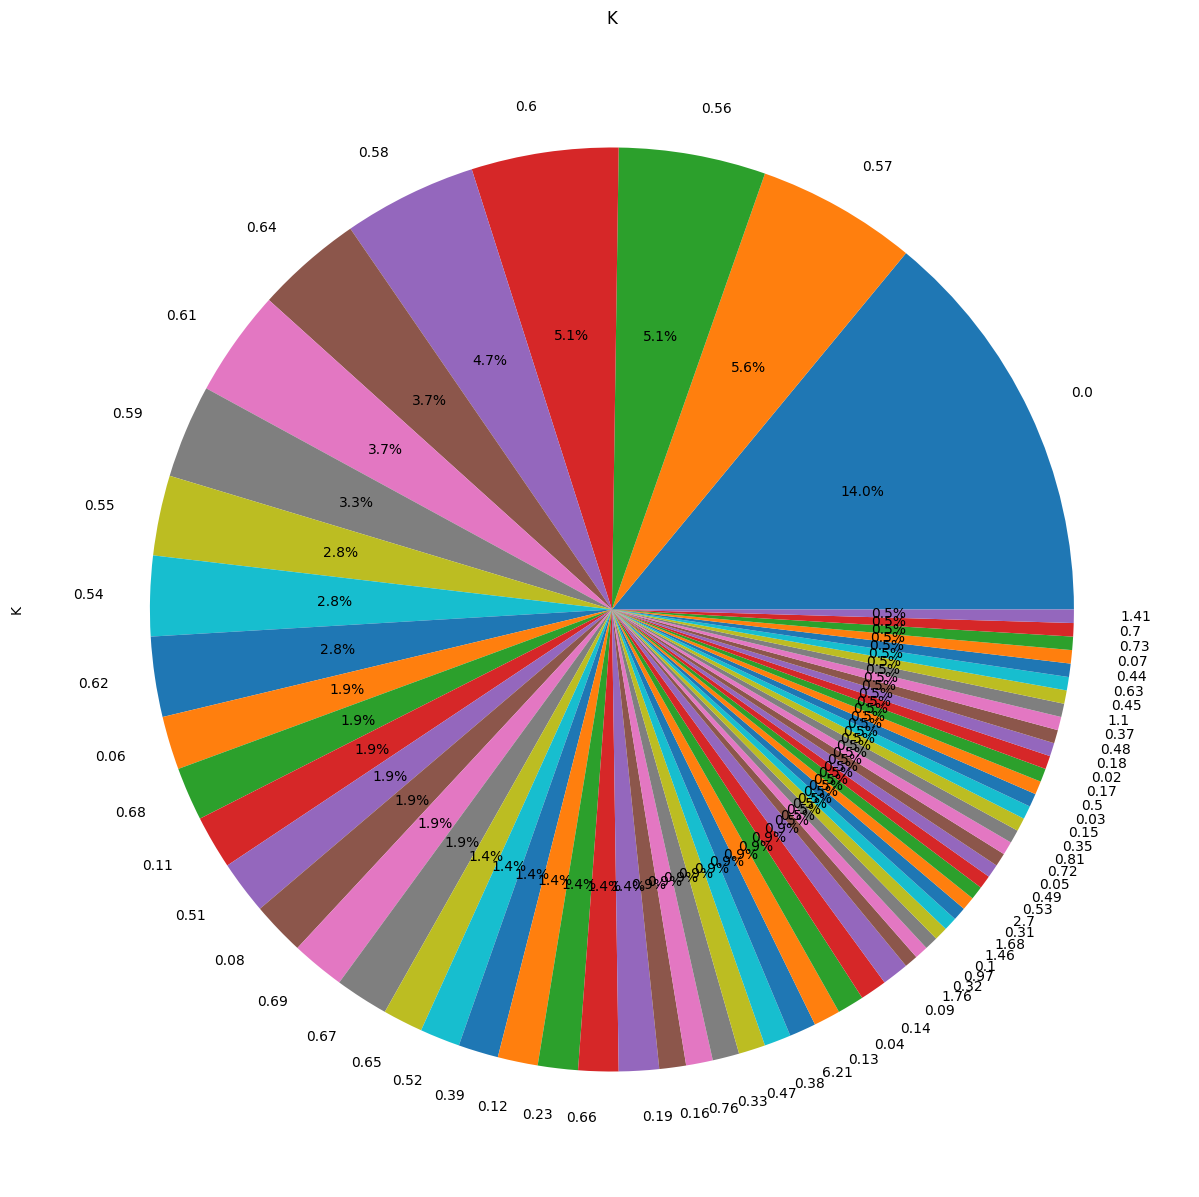

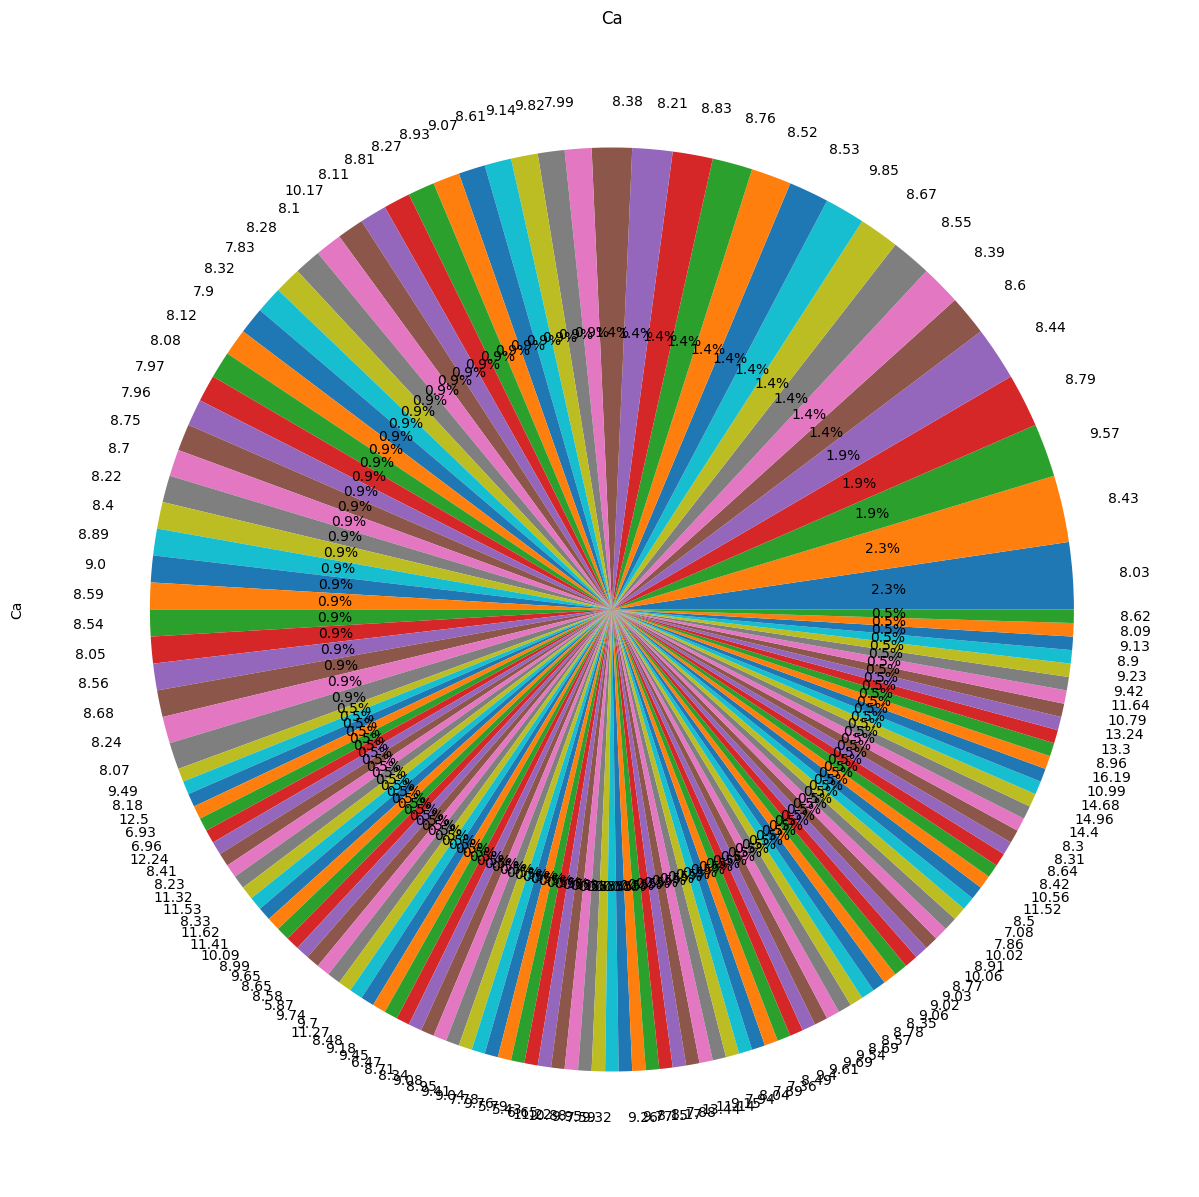

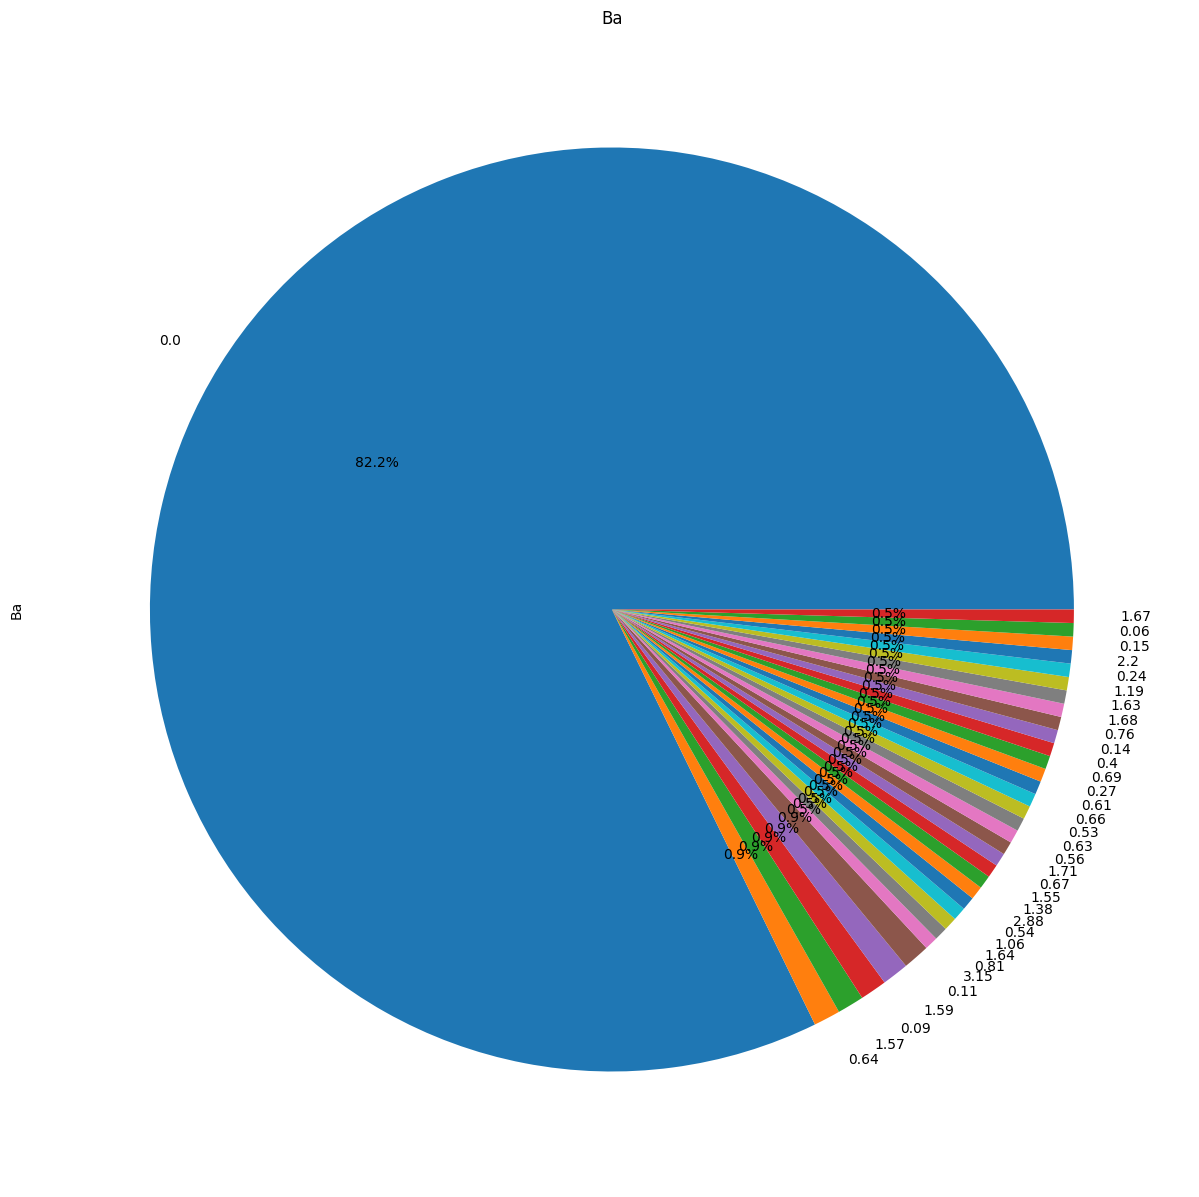

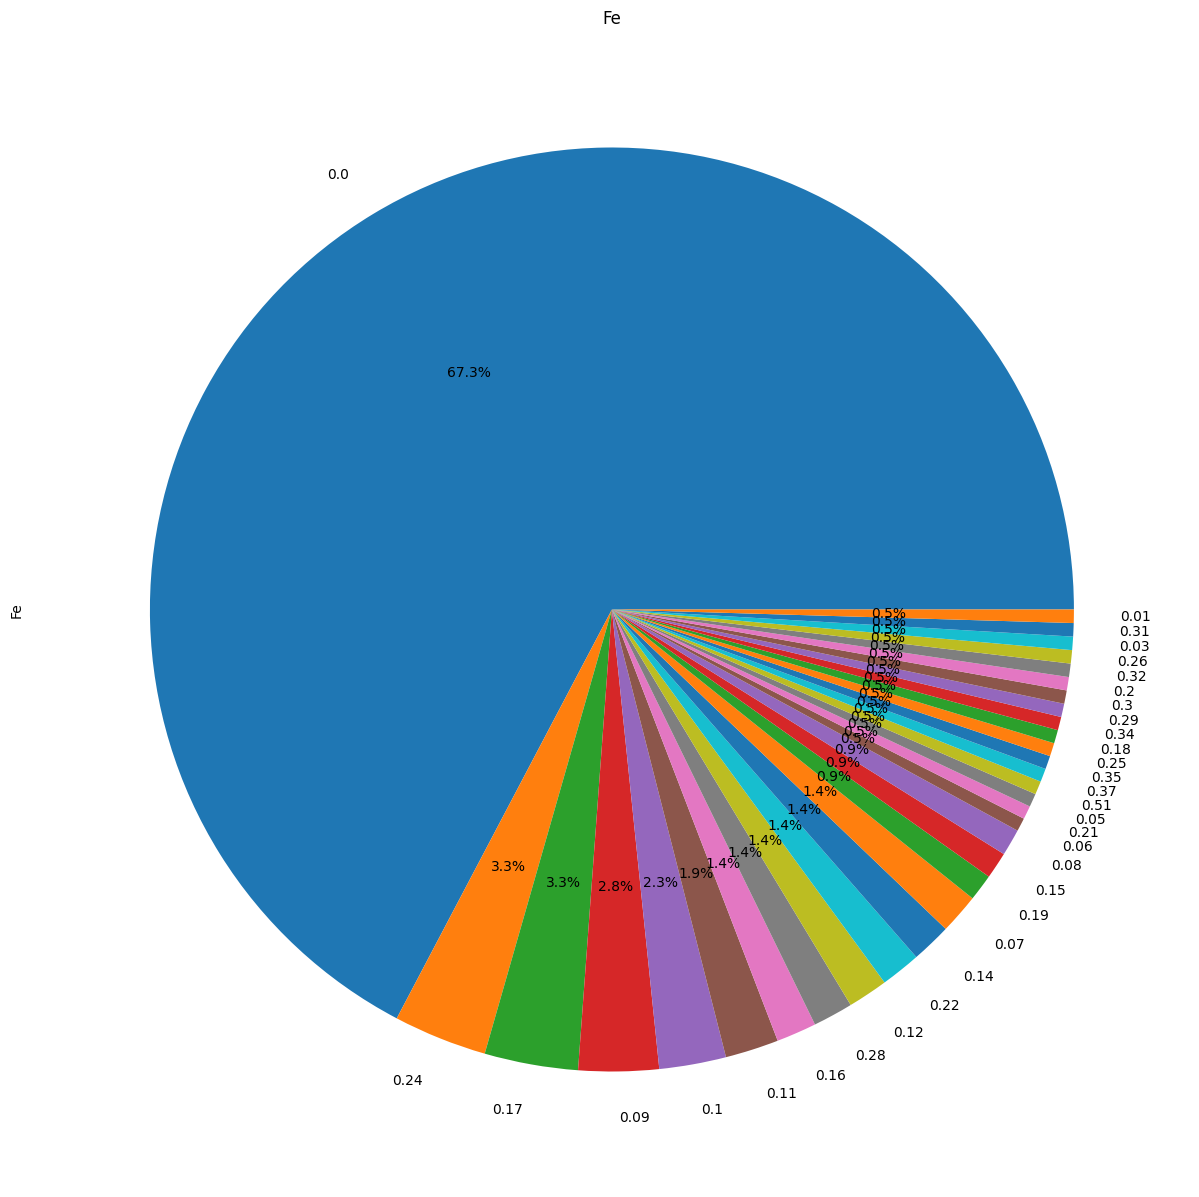

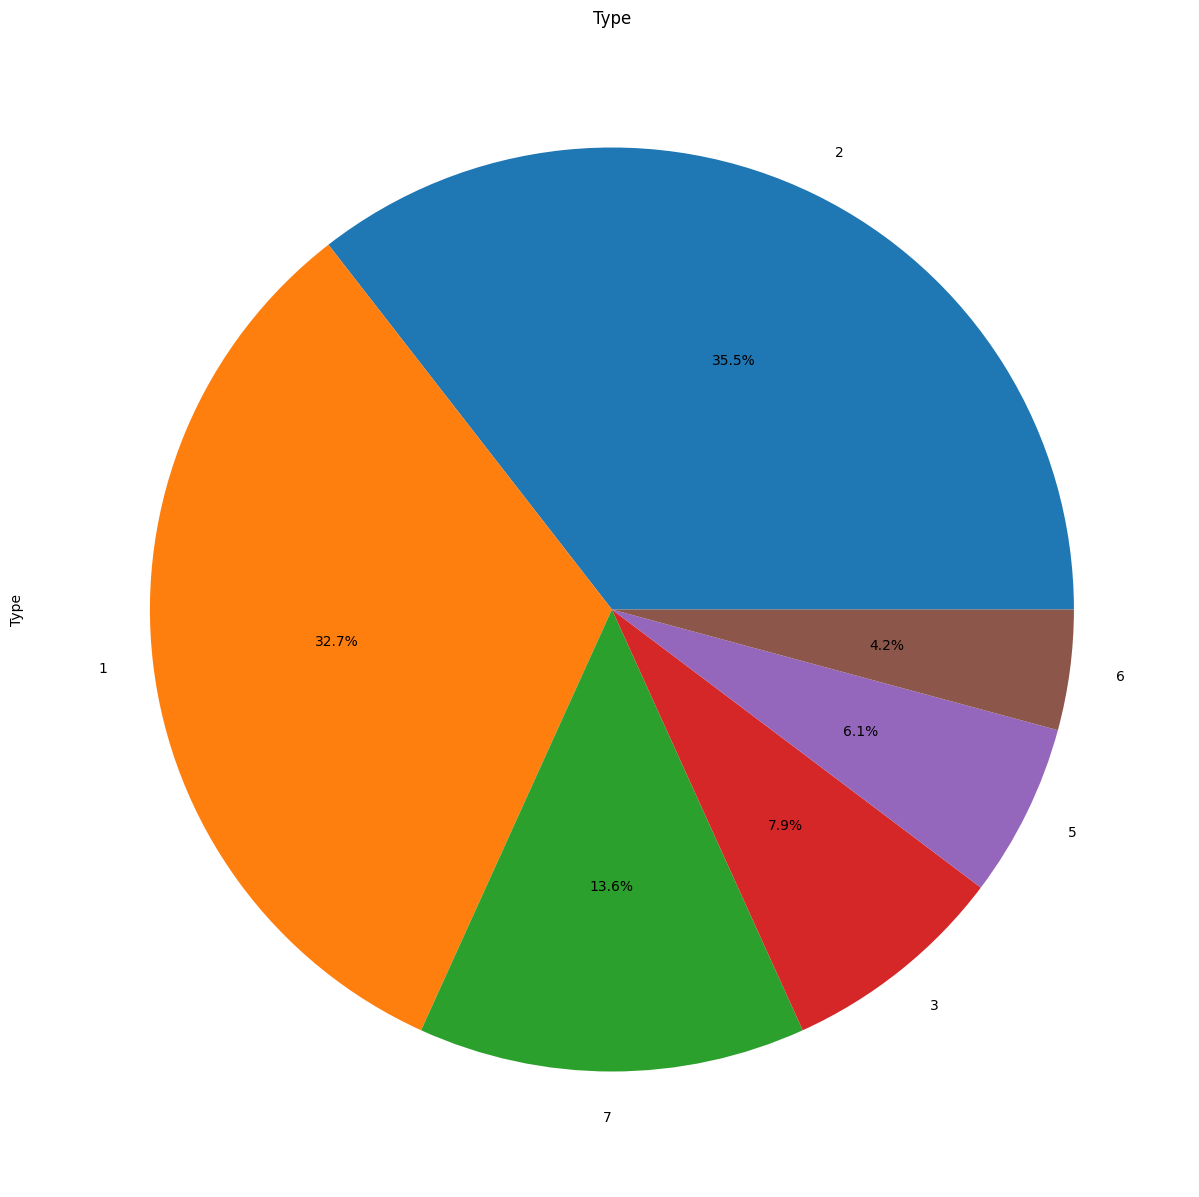

In [39]:
for i in range(len(df.columns)):
    current_column = df.iloc[:, i]
    current_column.value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(15,15))
    plt.title(current_column.name)
    plt.show()

# pie chart will help us to analyze the data in how much of volume its present
# in this dataset as the values are 0 and 1 so we can see their amount/frequency.

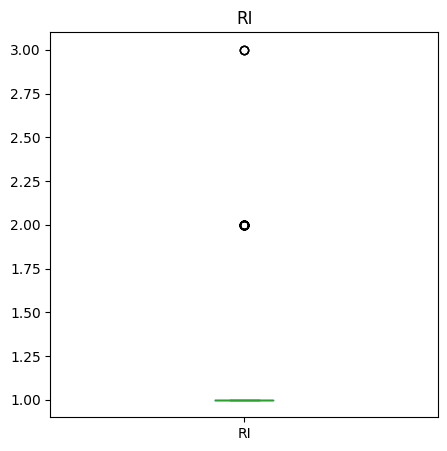

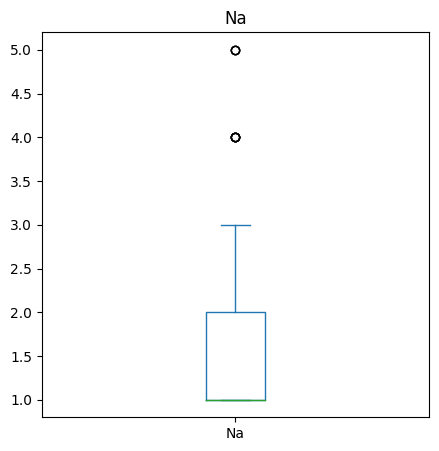

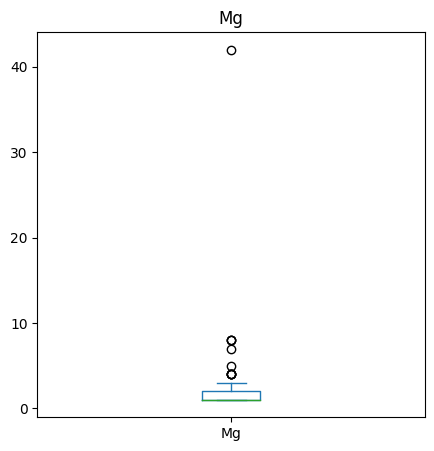

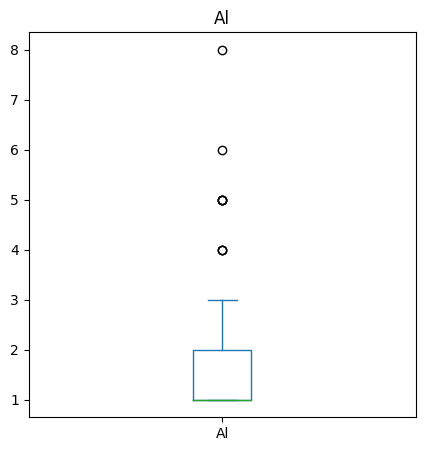

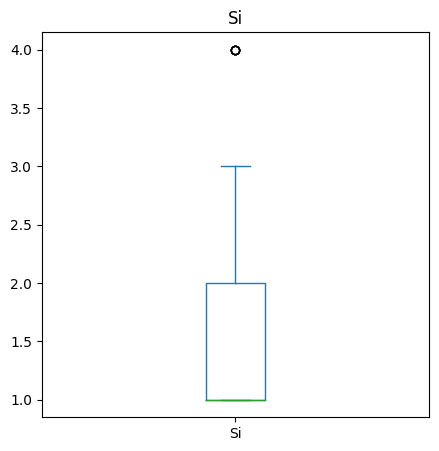

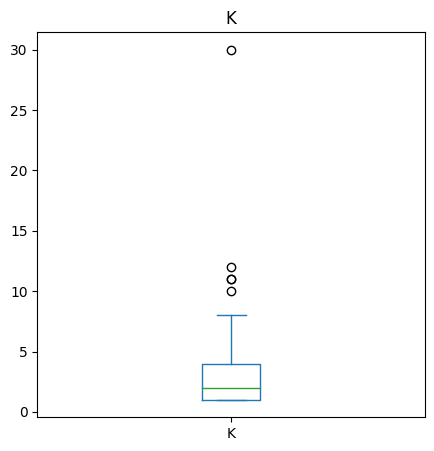

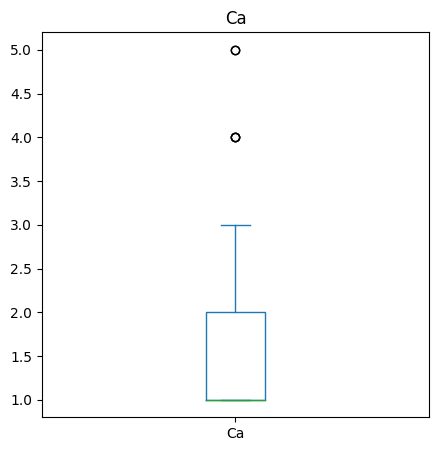

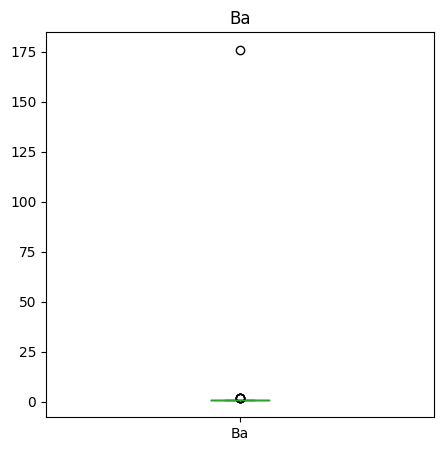

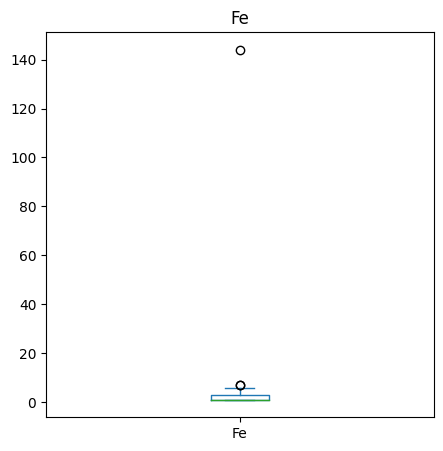

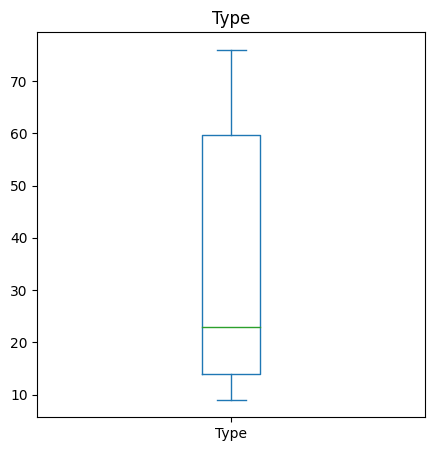

In [40]:
for i in range(len(df.columns)):
    current_column = df.iloc[:, i]
    current_column.value_counts().plot(kind='box',figsize=(5,5))
    plt.title(current_column.name)
    plt.show()

# by observing all the box plots of each varaible we can see that there are  outliers in all of them except type columns.
# therefore boxplots will help us in identifying the outliers.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop("Type",axis=1))

StandardScaler()

In [9]:
scaled_data = scaler.transform(df.drop("Type",axis=1))

In [10]:
new_df = pd.DataFrame(scaled_data,columns = df.columns[:-1])
new_df

RI        Na        Mg        Al        Si         K        Ca  \
0    0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1   -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2   -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3   -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4   -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   
..        ...       ...       ...       ...       ...       ...       ...   
209 -0.704815  0.898681 -1.865511  2.881125 -0.052974 -0.640968  0.157088   
210 -0.500178  1.856097 -1.865511  1.094342  0.529374 -0.763919 -0.392276   
211  0.754046  1.168721 -1.865511  1.154570  0.995252 -0.763919 -0.364103   
212 -0.612399  1.193270 -1.865511  0.993960  1.241133 -0.763919 -0.335931   
213 -0.414363  1.009152 -1.865511  1.275028  0.917606 -0.763919 -0.237327   

           Ba        Fe  
0   -0.352877 -0.586451  
1   -0.352877 -0.586451  
2   -0.352877 -0.586451  
3   -0.352877 -0.586451  
4   -0.352877 -0.586451  
..        ...       ...  
209  1.783978 -0.586451  
210  2.852405 -0.586451  
211  2.953200 -0.586451  
212  2.812087 -0.586451  
213  3.013677 -0.586451  

[214 rows x 9 columns]

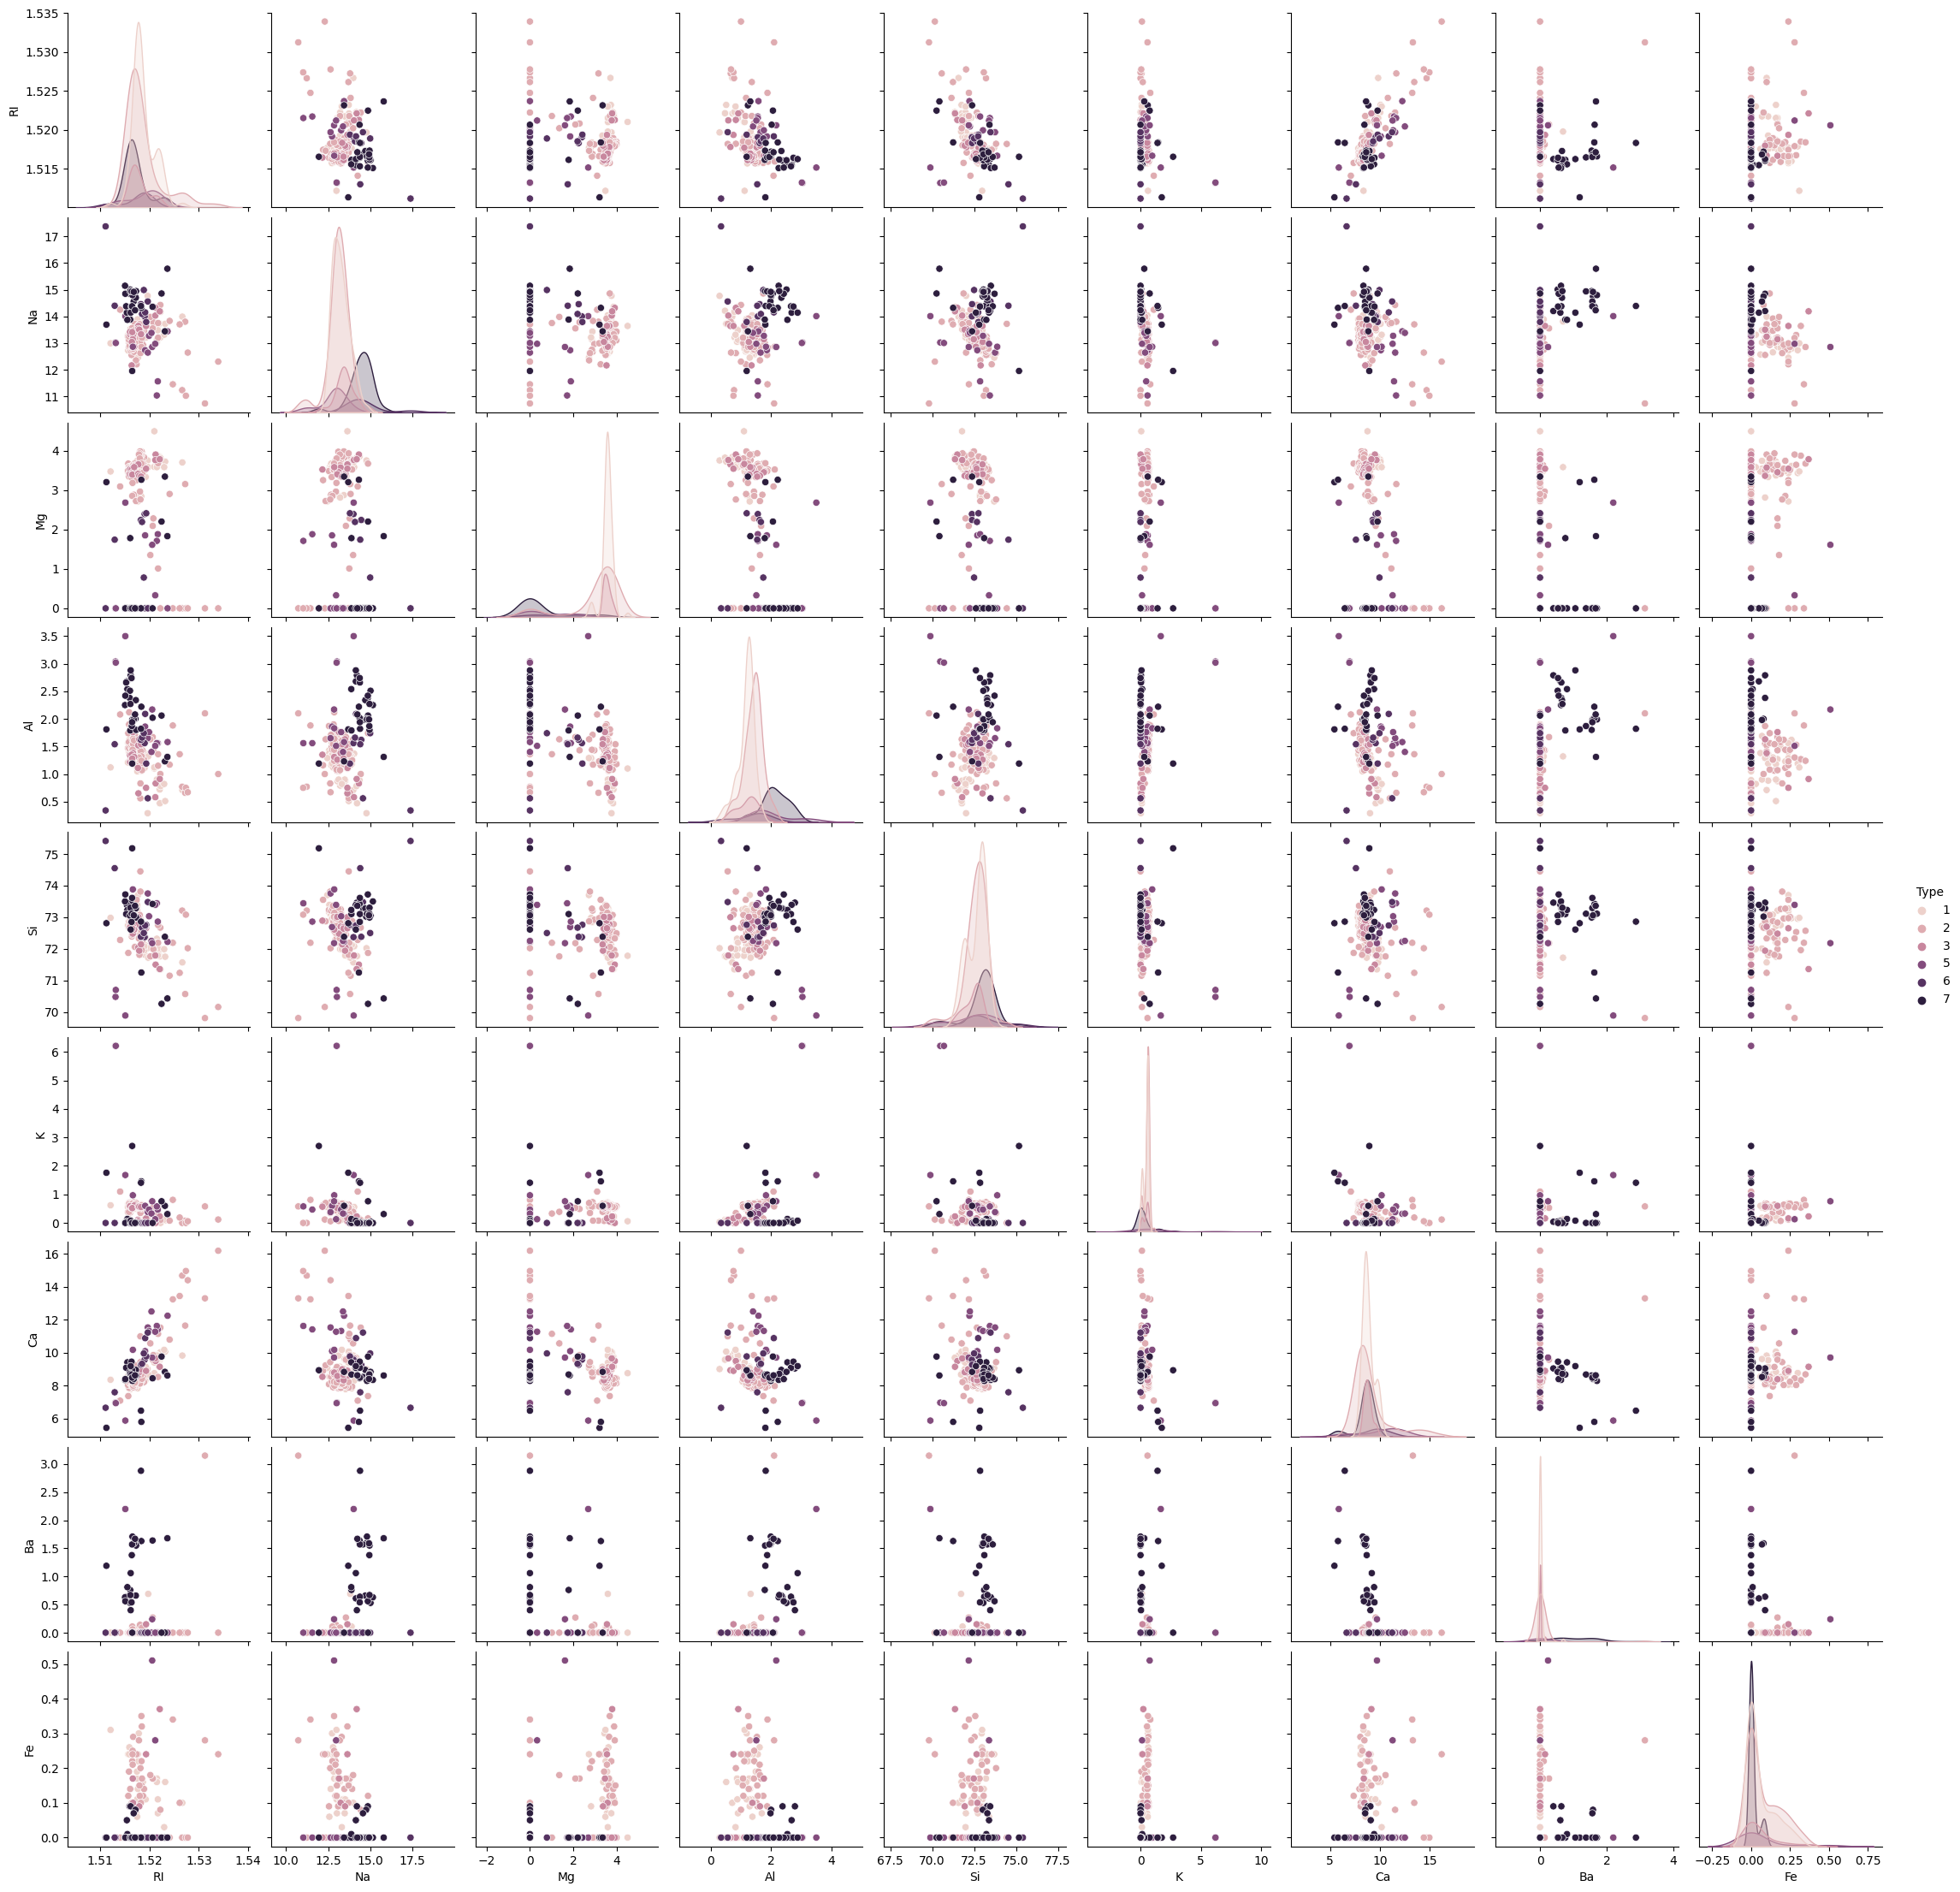

In [11]:
# plotting a pairplot using the type varaible
import seaborn as sns

sns.pairplot(df,hue="Type")

In [12]:
# splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_data,df["Type"],test_size=0.3)

In [13]:
# fitting the knn algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
pred = knn.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [16]:
print(confusion_matrix(y_test,pred))

[[14  2  1  0  0  0]
 [ 5 13  2  2  1  0]
 [ 3  3  0  0  0  0]
 [ 0  0  0  3  0  1]
 [ 0  0  0  0  2  2]
 [ 0  0  0  0  0 11]]


In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.64      0.82      0.72        17
           2       0.72      0.57      0.63        23
           3       0.00      0.00      0.00         6
           5       0.60      0.75      0.67         4
           6       0.67      0.50      0.57         4
           7       0.79      1.00      0.88        11

    accuracy                           0.66        65
   macro avg       0.57      0.61      0.58        65
weighted avg       0.63      0.66      0.64        65



In [18]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,new_df,df["Type"],cv=10)
    accuracy_rate.append(score.mean())

In [19]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,new_df,df['Type'],cv=10)
    error_rate.append(1-score.mean())

In [20]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

<AxesSubplot: >

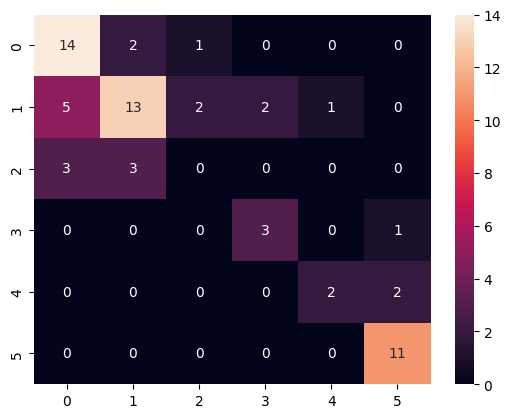

In [21]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

Text(0, 0.5, 'Error Rate')

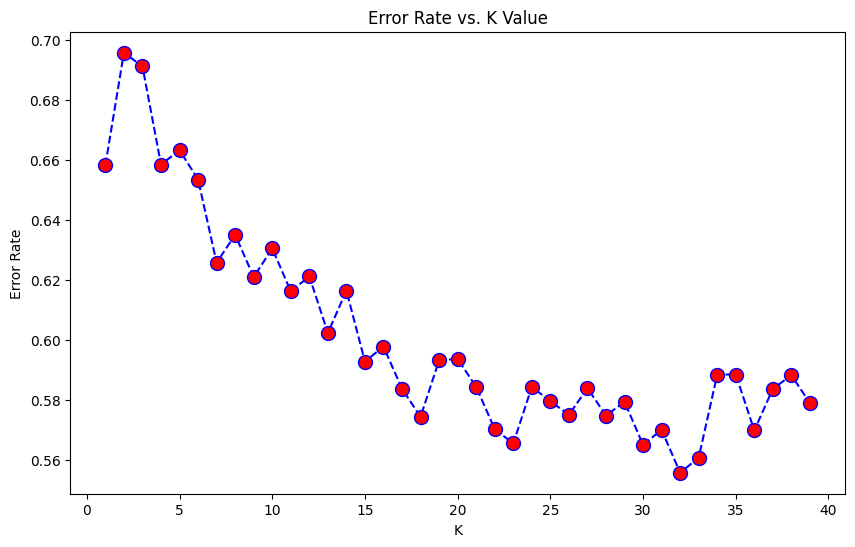

In [22]:
# plotting the accuracy rate on the graph along with the k-values
plt.figure(figsize=(10,6))

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# we can see that the accuracy keeps decreasing after k=3,4

In [23]:
# as the k value is 1 the accuracy and metrics score will be
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))
k_1=(accuracy_score(y_test,pred))

WITH K=1


[[14  2  1  0  0  0]
 [ 5 13  2  2  1  0]
 [ 3  3  0  0  0  0]
 [ 0  0  0  3  0  1]
 [ 0  0  0  0  2  2]
 [ 0  0  0  0  0 11]]


              precision    recall  f1-score   support

           1       0.64      0.82      0.72        17
           2       0.72      0.57      0.63        23
           3       0.00      0.00      0.00         6
           5       0.60      0.75      0.67         4
           6       0.67      0.50      0.57         4
           7       0.79      1.00      0.88        11

    accuracy                           0.66        65
   macro avg       0.57      0.61      0.58        65
weighted avg       0.63      0.66      0.64        65

0.6615384615384615


In [24]:
# as the k value is 2 the accuracy and metrics score will be
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))
k_2=(accuracy_score(y_test,pred))

WITH K=1


[[15  2  0  0  0  0]
 [ 9 10  1  3  0  0]
 [ 5  1  0  0  0  0]
 [ 0  0  0  3  0  1]
 [ 0  0  0  0  3  1]
 [ 1  0  0  0  0 10]]


              precision    recall  f1-score   support

           1       0.50      0.88      0.64        17
           2       0.77      0.43      0.56        23
           3       0.00      0.00      0.00         6
           5       0.50      0.75      0.60         4
           6       1.00      0.75      0.86         4
           7       0.83      0.91      0.87        11

    accuracy                           0.63        65
   macro avg       0.60      0.62      0.59        65
weighted avg       0.64      0.63      0.60        65

0.6307692307692307


In [25]:
# as the k value is 4 the accuracy and metrics score will be
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))
k_4=(accuracy_score(y_test,pred))

WITH K=1


[[16  1  0  0  0  0]
 [ 7 13  0  2  1  0]
 [ 6  0  0  0  0  0]
 [ 0  0  0  2  0  2]
 [ 1  0  0  0  1  2]
 [ 0  0  0  0  0 11]]


              precision    recall  f1-score   support

           1       0.53      0.94      0.68        17
           2       0.93      0.57      0.70        23
           3       0.00      0.00      0.00         6
           5       0.50      0.50      0.50         4
           6       0.50      0.25      0.33         4
           7       0.73      1.00      0.85        11

    accuracy                           0.66        65
   macro avg       0.53      0.54      0.51        65
weighted avg       0.65      0.66      0.62        65

0.6615384615384615


In [26]:
# now let us give a list and get the k values
knn=[1,2,3,4,5,6,7]
for knn in knn:
    knn = KNeighborsClassifier(n_neighbors=knn)

    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)

    print('with k')
    print('\n')
    print(confusion_matrix(y_test,pred))
    print('\n')
    print(classification_report(y_test,pred))

with k


[[14  2  1  0  0  0]
 [ 5 13  2  2  1  0]
 [ 3  3  0  0  0  0]
 [ 0  0  0  3  0  1]
 [ 0  0  0  0  2  2]
 [ 0  0  0  0  0 11]]


              precision    recall  f1-score   support

           1       0.64      0.82      0.72        17
           2       0.72      0.57      0.63        23
           3       0.00      0.00      0.00         6
           5       0.60      0.75      0.67         4
           6       0.67      0.50      0.57         4
           7       0.79      1.00      0.88        11

    accuracy                           0.66        65
   macro avg       0.57      0.61      0.58        65
weighted avg       0.63      0.66      0.64        65

with k


[[15  2  0  0  0  0]
 [ 9 10  1  3  0  0]
 [ 5  1  0  0  0  0]
 [ 0  0  0  3  0  1]
 [ 0  0  0  0  3  1]
 [ 1  0  0  0  0 10]]


              precision    recall  f1-score   support

           1       0.50      0.88      0.64        17
           2       0.77      0.43      0.56        23
           3      

In [27]:
# or we can go with the for loop also
for i in range(1,50,1):
    knn_model=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    y_pred=knn_model.predict(X_test)
    print('K value is: ',i)
    print(accuracy_score(y_test,y_pred))

K value is:  1
0.6615384615384615
K value is:  2
0.6307692307692307
K value is:  3
0.6615384615384615
K value is:  4
0.6615384615384615
K value is:  5
0.6461538461538462
K value is:  6
0.6615384615384615
K value is:  7
0.6461538461538462
K value is:  8
0.6461538461538462
K value is:  9
0.6307692307692307
K value is:  10
0.6307692307692307
K value is:  11
0.6153846153846154
K value is:  12
0.6
K value is:  13
0.6
K value is:  14
0.6
K value is:  15
0.5538461538461539
K value is:  16
0.5384615384615384
K value is:  17
0.5538461538461539
K value is:  18
0.5538461538461539
K value is:  19
0.5692307692307692
K value is:  20
0.5692307692307692
K value is:  21
0.5846153846153846
K value is:  22
0.5846153846153846
K value is:  23
0.5692307692307692
K value is:  24
0.5538461538461539
K value is:  25
0.5538461538461539
K value is:  26
0.5384615384615384
K value is:  27
0.5384615384615384
K value is:  28
0.5384615384615384
K value is:  29
0.5538461538461539
K value is:  30
0.5230769230769231
K va

In [28]:
k_3=0.7692307692307693
k_5=0.6923076923076923
# we can see that the k_neighbors=2 has the highest accuracy scores
# and there is a gradual decrease in the accuracy score as the k value is increases i.e n_neighbors

In [29]:
#make a table containing accuracy score value for each value of k_neighbors
scores={'KNN Model':['n_neighbors=1','n_neighbors=2',"n_neighbors=3","n_neighbors=4","n_neighbors=5"],'Accuracy_scores':[k_1,k_2,k_3,k_4,k_5]}
table=pd.DataFrame(scores)
table
# as we can see that the accuracy score starts decrasing from 5 so its better to go with k values as 3 or 4 on this dataset.

KNN Model  Accuracy_scores
0  n_neighbors=1         0.661538
1  n_neighbors=2         0.630769
2  n_neighbors=3         0.769231
3  n_neighbors=4         0.661538
4  n_neighbors=5         0.692308